In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [196]:
daily_stat = pd.read_csv('daily_stat.csv').dropna()
daily_stat

date   Gas_sum   Gas_max   Gas_min  Gas_mean  ext_temp_max  \
0    2020-03-08  3.390954  0.142667  0.020000  0.070645     10.966667   
1    2020-03-09  4.457667  0.209000  0.012000  0.092868     11.333333   
2    2020-03-10  3.381333  0.157667  0.021667  0.070444     12.900000   
3    2020-03-11  4.357000  0.210667  0.018333  0.090771     12.000000   
4    2020-03-12  4.533103  0.196897  0.035862  0.094440      9.533333   
..          ...       ...       ...       ...       ...           ...   
354  2021-02-25  3.075368  0.158667  0.012667  0.064070      9.800000   
356  2021-02-27  3.870000  0.148000  0.029667  0.082340     11.800000   
357  2021-02-28  3.249333  0.144333  0.021000  0.067694     11.466667   
358  2021-03-01  3.343667  0.197667  0.009333  0.069660     11.466667   
359  2021-03-02  4.108333  0.459667  0.018333  0.085590      4.500000   

     ext_temp_min  ext_temp_mean  ext_hum_max  ext_hum_min  ...  SH_temp_mean  \
0        5.633333       8.673611    85.666667    55.000000  ...     20.440088   
1        6.400000       8.072917    89.333333    61.333333  ...     19.974721   
2        8.366667      11.388194    90.000000    58.333333  ...     20.405663   
3        6.000000       8.868056    77.000000    56.333333  ...     20.491250   
4        4.033333       6.532639    78.666667    52.333333  ...     19.898139   
..            ...            ...          ...          ...  ...           ...   
354      4.233333       7.747222    85.333333    58.666667  ...     20.894433   
356      1.133333       6.463830    90.000000    50.666667  ...     20.957647   
357      1.033333       6.178472    90.000000    51.666667  ...     20.723700   
358      2.300000       5.593750    87.666667    52.333333  ...     20.554832   
359      2.600000       3.345098    81.000000    78.000000  ...     20.403154   

     SH_hum_max  SH_hum_min  SH_hum_mean  DWH_temp_max  DWH_temp_min  \
0     56.348934   48.547807    52.482633     21.527065     18.830000   
1     55.553181   48.356860    51.514063     22.500000     17.166000   
2     58.069711   51.024262    55.408013     22.662600     17.957400   
3     54.798436   47.512478    52.187974     22.529808     19.076923   
4     48.051281   41.042851    45.248958     22.230556     18.543462   
..          ...         ...          ...           ...           ...   
354   61.412240   49.264031    56.110918     21.632727     19.540000   
356   52.617157   48.526470    50.546910     22.151477     19.926739   
357   52.379383   49.446407    51.351237     22.558750     19.261087   
358   52.995683   49.081847    50.872736     22.187609     18.216087   
359   51.599304   47.176381    49.352818     22.674565     18.594545   

     DWH_temp_mean  DWH_hum_max  DWH_hum_min  DWH_hum_mean  
0        20.404865    54.471739    48.157083     49.943412  
1        20.458280    77.400000    46.037115     52.373323  
2        20.991088    59.439600    49.091200     52.729024  
3        21.502654    57.177308    43.674200     48.275562  
4        21.127058    48.535962    38.434400     40.883145  
..             ...          ...          ...           ...  
354      20.743657    64.452174    49.832273     54.596733  
356      20.718636    53.565500    47.776087     49.642770  
357      20.896852    54.471522    47.411304     49.526565  
358      20.925813    56.015652    47.803261     49.608494  
359      21.036228    54.542273    45.278571     48.077677  

[348 rows x 23 columns]

In [197]:

# Define the function to classify periods
def classify_heating_period(row):
    if row['ext_temp_mean'] < 15:
        return 'SH+DWH'
    else:
        return 'DWH'


In [198]:

# Apply the function to create a new column
daily_stat['Heating_Period'] = daily_stat.apply(classify_heating_period, axis=1)

In [199]:
daily_stat['ext_temp_mean'].describe()

count    348.000000
mean      11.031348
std        5.084060
min       -0.736806
25%        7.636111
50%       11.349826
75%       14.619965
max       24.492361
Name: ext_temp_mean, dtype: float64

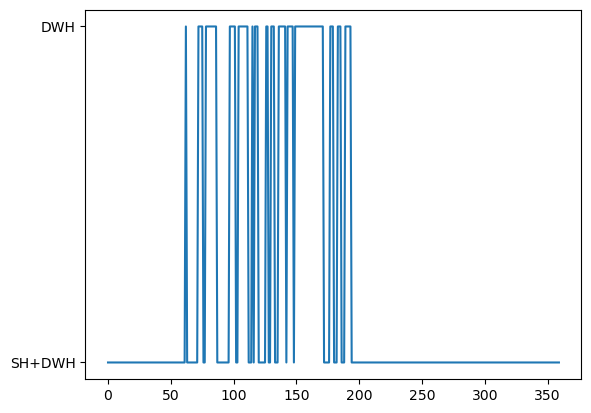

In [200]:
plt.plot(daily_stat['Heating_Period'])
plt.show()

In [201]:
daily_rounded = pd.DataFrame(daily_stat)

In [202]:
columns_to_round = daily_stat.columns.drop('date')


In [203]:
daily_rounded[columns_to_round] = daily_rounded[columns_to_round].round(4)


In [204]:
daily_rounded.head(70)

date  Gas_sum  Gas_max  Gas_min  Gas_mean  ext_temp_max  \
0   2020-03-08   3.3910   0.1427   0.0200    0.0706       10.9667   
1   2020-03-09   4.4577   0.2090   0.0120    0.0929       11.3333   
2   2020-03-10   3.3813   0.1577   0.0217    0.0704       12.9000   
3   2020-03-11   4.3570   0.2107   0.0183    0.0908       12.0000   
4   2020-03-12   4.5331   0.1969   0.0359    0.0944        9.5333   
..         ...      ...      ...      ...       ...           ...   
65  2020-05-12   2.2727   0.1177   0.0130    0.0473       11.1667   
66  2020-05-13   1.9500   0.1037   0.0080    0.0406       11.3333   
67  2020-05-14   1.8253   0.0983   0.0067    0.0380       12.4000   
68  2020-05-15   2.0163   0.0897   0.0043    0.0420       12.3333   
69  2020-05-16   1.4390   0.0673   0.0040    0.0300       14.3000   

    ext_temp_min  ext_temp_mean  ext_hum_max  ext_hum_min  ...  SH_hum_max  \
0         5.6333         8.6736      85.6667      55.0000  ...     56.3489   
1         6.4000         8.0729      89.3333      61.3333  ...     55.5532   
2         8.3667        11.3882      90.0000      58.3333  ...     58.0697   
3         6.0000         8.8681      77.0000      56.3333  ...     54.7984   
4         4.0333         6.5326      78.6667      52.3333  ...     48.0513   
..           ...            ...          ...          ...  ...         ...   
65        4.1667         8.5347      80.3333      54.6667  ...     50.4643   
66        5.0667         8.1174      79.6667      32.3333  ...     50.1701   
67        1.9333         8.4396      77.6667      35.0000  ...     47.3811   
68        6.9000         9.9632      85.0000      50.0000  ...     49.3134   
69        9.5000        11.8097      79.0000      44.3333  ...     50.8032   

    SH_hum_min  SH_hum_mean  DWH_temp_max  DWH_temp_min  DWH_temp_mean  \
0      48.5478      52.4826       21.5271       18.8300        20.4049   
1      48.3569      51.5141       22.5000       17.1660        20.4583   
2      51.0243      55.4080       22.6626       17.9574        20.9911   
3      47.5125      52.1880       22.5298       19.0769        21.5027   
4      41.0429      45.2490       22.2306       18.5435        21.1271   
..         ...          ...           ...           ...            ...   
65     45.7849      47.5506       21.8009       17.7410        20.2024   
66     42.0581      45.6651       21.0670       19.8185        20.5227   
67     39.1430      43.4601       22.1787       18.5448        21.0507   
68     45.0865      47.5436       21.7644       19.7050        21.1780   
69     43.4655      47.6978       21.6454       19.4750        20.9822   

    DWH_hum_max  DWH_hum_min  DWH_hum_mean  Heating_Period  
0       54.4717      48.1571       49.9434          SH+DWH  
1       77.4000      46.0371       52.3733          SH+DWH  
2       59.4396      49.0912       52.7290          SH+DWH  
3       57.1773      43.6742       48.2756          SH+DWH  
4       48.5360      38.4344       40.8831          SH+DWH  
..          ...          ...           ...             ...  
65      52.0643      44.9227       48.7409          SH+DWH  
66      51.7038      42.6914       47.0799          SH+DWH  
67      52.7483      40.0394       45.1703          SH+DWH  
68      51.6892      46.4921       48.6883          SH+DWH  
69      53.0628      46.6840       49.5086          SH+DWH  

[70 rows x 24 columns]

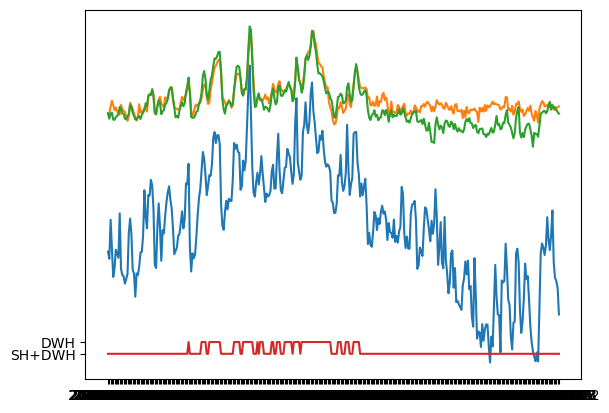

In [205]:
plt.plot(daily_rounded['date'],daily_rounded['ext_temp_mean'])
plt.plot(daily_rounded['date'],daily_rounded['DWH_temp_mean'])
plt.plot(daily_rounded['date'],daily_rounded['SH_temp_mean'])
plt.plot(daily_rounded['date'],daily_rounded['Heating_Period'])

plt.show()

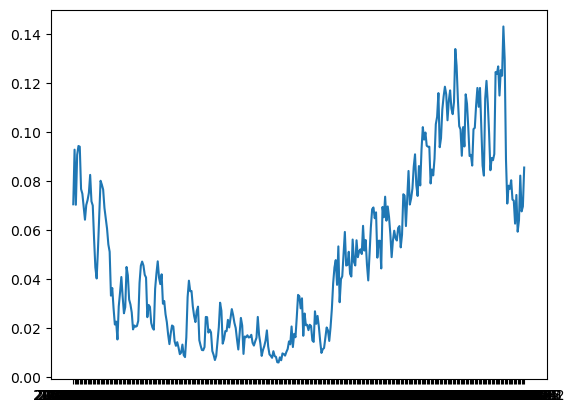

In [206]:
plt.plot(daily_rounded['date'],daily_rounded['Gas_mean'])

#plt.plot(daily_rounded['Date'],daily_rounded['SH_temp_max'])

plt.show()

In [207]:
daily_stat['Gas_mean'].describe()

count    348.000000
mean       0.050514
std        0.034620
min        0.006021
25%        0.020201
50%        0.042215
75%        0.075516
max        0.143236
Name: Gas_mean, dtype: float64

In [208]:
daily_stat.dtypes

date               object
Gas_sum           float64
Gas_max           float64
Gas_min           float64
Gas_mean          float64
ext_temp_max      float64
ext_temp_min      float64
ext_temp_mean     float64
ext_hum_max       float64
ext_hum_min       float64
ext_hum_mean      float64
SH_temp_max       float64
SH_temp_min       float64
SH_temp_mean      float64
SH_hum_max        float64
SH_hum_min        float64
SH_hum_mean       float64
DWH_temp_max      float64
DWH_temp_min      float64
DWH_temp_mean     float64
DWH_hum_max       float64
DWH_hum_min       float64
DWH_hum_mean      float64
Heating_Period     object
dtype: object

In [209]:
features = daily_stat[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']]
target = daily_stat['Gas_mean']

In [210]:

# Normalize features
features = (features - features.mean()) / features.std()


In [211]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [212]:

# Build neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


In [213]:

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')


In [214]:

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)



Epoch 1/100
7/7 [==============================] - 1s 23ms/step - loss: 0.0476 - val_loss: 0.0096
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0233 - val_loss: 0.0096
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.0034
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - val_loss: 0.0024
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0164 - val_loss: 0.0019
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.0017
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0020
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0017
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0015
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0091 - val_loss: 0.0013
Epoch 11/100
7/7 [==========

Epoch 81/100
7/7 [==============================] - 0s 6ms/step - loss: 9.7944e-04 - val_loss: 2.1676e-04
Epoch 82/100
7/7 [==============================] - 0s 7ms/step - loss: 5.8411e-04 - val_loss: 2.4918e-04
Epoch 83/100
7/7 [==============================] - 0s 5ms/step - loss: 6.4566e-04 - val_loss: 2.2281e-04
Epoch 84/100
7/7 [==============================] - 0s 5ms/step - loss: 5.5893e-04 - val_loss: 2.1095e-04
Epoch 85/100
7/7 [==============================] - 0s 6ms/step - loss: 5.1070e-04 - val_loss: 2.0494e-04
Epoch 86/100
7/7 [==============================] - 0s 6ms/step - loss: 5.7480e-04 - val_loss: 1.9177e-04
Epoch 87/100
7/7 [==============================] - 0s 5ms/step - loss: 7.2813e-04 - val_loss: 1.7684e-04
Epoch 88/100
7/7 [==============================] - 0s 6ms/step - loss: 4.3186e-04 - val_loss: 1.7759e-04
Epoch 89/100
7/7 [==============================] - 0s 6ms/step - loss: 4.9635e-04 - val_loss: 2.0382e-04
Epoch 90/100
7/7 [============================

In [215]:

# Evaluate model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

3/3 [==============================] - 0s 2ms/step - loss: 2.3963e-04
Test Loss: 0.00023962618433870375


In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


In [217]:
# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [218]:

# Build neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=200, random_state=42)


In [219]:

# Train model
history = model.fit(X_train, y_train)


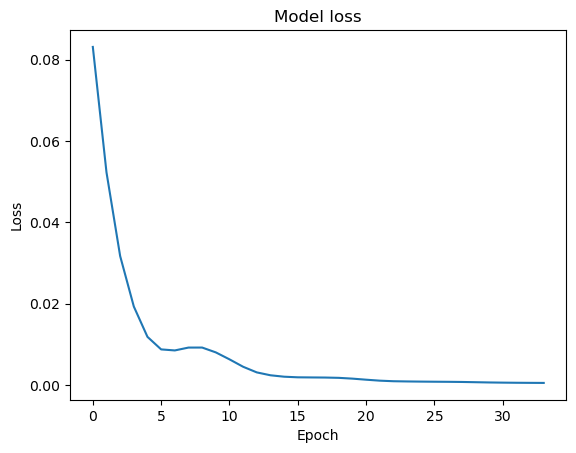

In [220]:

# Plotting training loss values
plt.plot(history.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# predictions hourly


In [221]:
daily_stat = pd.read_csv('hourly_stat.csv').dropna()
daily_stat

date   Gas_sum   Gas_max   Gas_min  Gas_mean  \
0     2020-03-08 00:00:00  0.080621  0.048621  0.032000  0.040310   
1     2020-03-08 01:00:00  0.057000  0.032333  0.024667  0.028500   
2     2020-03-08 02:00:00  0.057333  0.035333  0.022000  0.028667   
3     2020-03-08 03:00:00  0.072000  0.043000  0.029000  0.036000   
4     2020-03-08 04:00:00  0.051333  0.027667  0.023667  0.025667   
...                   ...       ...       ...       ...       ...   
8620  2021-03-02 04:00:00  0.043333  0.025000  0.018333  0.021667   
8621  2021-03-02 05:00:00  0.038667  0.020000  0.018667  0.019333   
8622  2021-03-02 06:00:00  0.149000  0.094667  0.054333  0.074500   
8623  2021-03-02 07:00:00  0.228667  0.120333  0.108333  0.114333   
8624  2021-03-02 08:00:00  0.228000  0.117667  0.110333  0.114000   

      ext_temp_max  ext_temp_min  ext_temp_mean  ext_hum_max  ext_hum_min  \
0        10.100000     10.100000      10.100000    83.000000    82.666667   
1        10.166667     10.033333      10.100000    85.000000    84.333333   
2        10.200000     10.000000      10.100000    85.666667    84.000000   
3        10.100000      9.966667      10.033333    81.666667    79.333333   
4         9.733333      9.466667       9.600000    75.000000    73.000000   
...            ...           ...            ...          ...          ...   
8620      3.200000      2.900000       3.050000    79.666667    79.333333   
8621      2.633333      2.633333       2.633333    79.000000    79.000000   
8622      2.600000      2.600000       2.600000    79.333333    79.333333   
8623      2.633333      2.600000       2.616667    79.000000    79.000000   
8624      2.633333      2.633333       2.633333    78.666667    78.666667   

      ...  SH_temp_mean  SH_hum_max  SH_hum_min  SH_hum_mean  DWH_temp_max  \
0     ...     20.907591   53.957879   53.204083    53.580981     21.527065   
1     ...     20.494126   54.679370   54.429973    54.554672     21.183300   
2     ...     20.487254   55.010402   54.982286    54.996344     21.039000   
3     ...     20.365186   56.348934   55.838001    56.093468     20.755000   
4     ...     20.276276   55.544823   54.731292    55.138057     20.629130   
...   ...           ...         ...         ...          ...           ...   
8620  ...     19.664339   51.411650   51.376945    51.394298     20.586957   
8621  ...     19.348004   51.565290   51.544731    51.555011     20.255217   
8622  ...     19.302289   51.599304   51.250863    51.425083     20.041957   
8623  ...     19.750493   50.872917   50.183950    50.528433     20.751630   
8624  ...     19.924667   49.860890   49.092004    49.476447     20.734545   

      DWH_temp_min  DWH_temp_mean  DWH_hum_max  DWH_hum_min  DWH_hum_mean  
0        21.357708      21.442387    49.417708    48.271957     48.844832  
1        21.037000      21.110150    49.971400    49.740800     49.856100  
2        20.913600      20.976300    51.145600    50.464000     50.804800  
3        20.529783      20.642391    50.691250    50.689130     50.690190  
4        20.623750      20.626440    50.171875    50.127174     50.149524  
...            ...            ...          ...          ...           ...  
8620     20.469545      20.528251    48.646522    48.528409     48.587465  
8621     20.084783      20.170000    48.218478    48.174130     48.196304  
8622     18.594545      19.318251    54.542273    48.485652     51.513962  
8623     20.539783      20.645707    47.233043    47.171522     47.202283  
8624     20.646136      20.690341    46.696136    46.570227     46.633182  

[8312 rows x 23 columns]

In [222]:
df=daily_stat.dropna()

features = df[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']].dropna()
target = df['Gas_mean'].dropna()

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)


Test R^2 Score: -0.24864245931831763


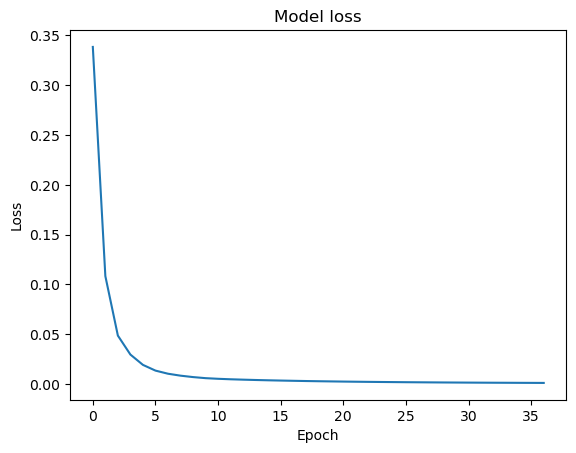

In [223]:


# Build neural network model
model = MLPRegressor(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate model
loss = model.score(X_test, y_test)
print(f'Test R^2 Score: {loss}')

# Plotting training loss values
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [224]:
df.dtypes

date              object
Gas_sum          float64
Gas_max          float64
Gas_min          float64
Gas_mean         float64
ext_temp_max     float64
ext_temp_min     float64
ext_temp_mean    float64
ext_hum_max      float64
ext_hum_min      float64
ext_hum_mean     float64
SH_temp_max      float64
SH_temp_min      float64
SH_temp_mean     float64
SH_hum_max       float64
SH_hum_min       float64
SH_hum_mean      float64
DWH_temp_max     float64
DWH_temp_min     float64
DWH_temp_mean    float64
DWH_hum_max      float64
DWH_hum_min      float64
DWH_hum_mean     float64
dtype: object

In [225]:
# Predict gas consumption on the test set
predictions = model.predict(X_test)

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
# Replace with your actual logic to determine SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
# These are placeholders. Replace with your actual decomposition method if available
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods


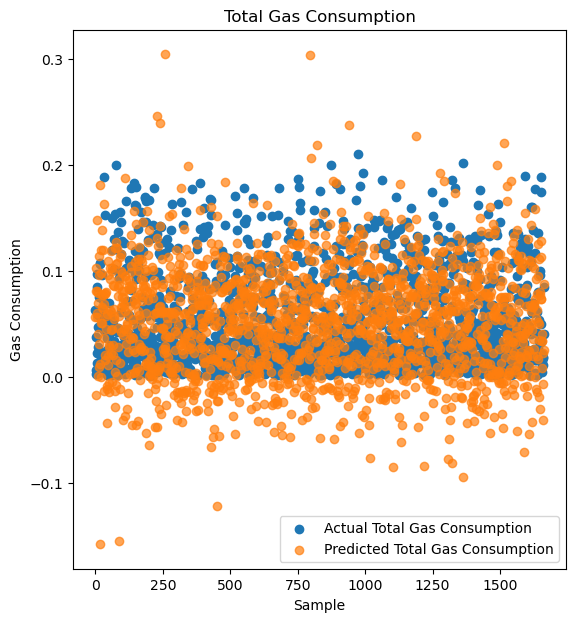

In [226]:

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()


plt.show()

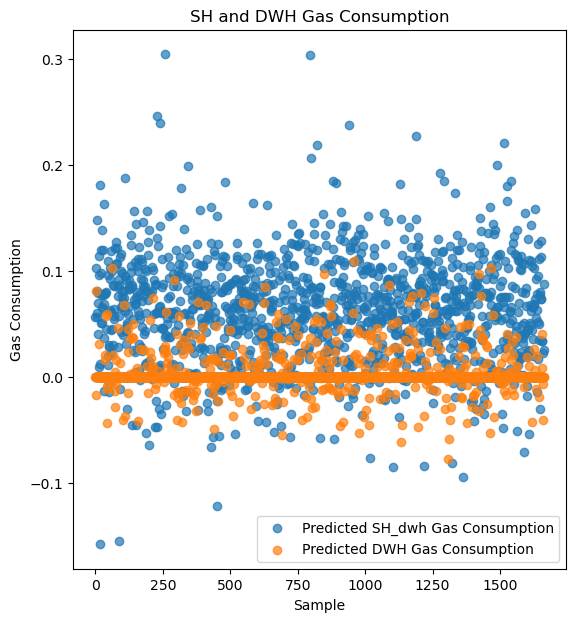

In [227]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH_dwh Gas Consumption', alpha=0.7)
plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
plt.title('SH and DWH Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

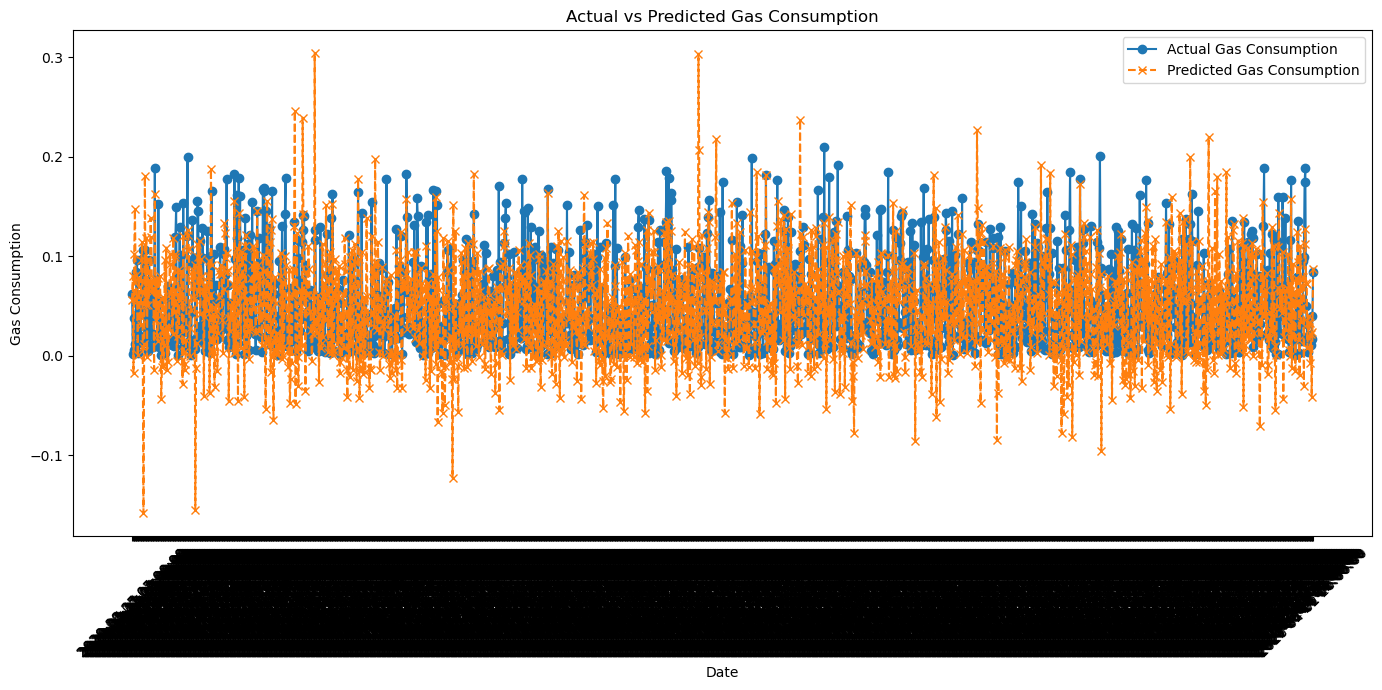

In [228]:
# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

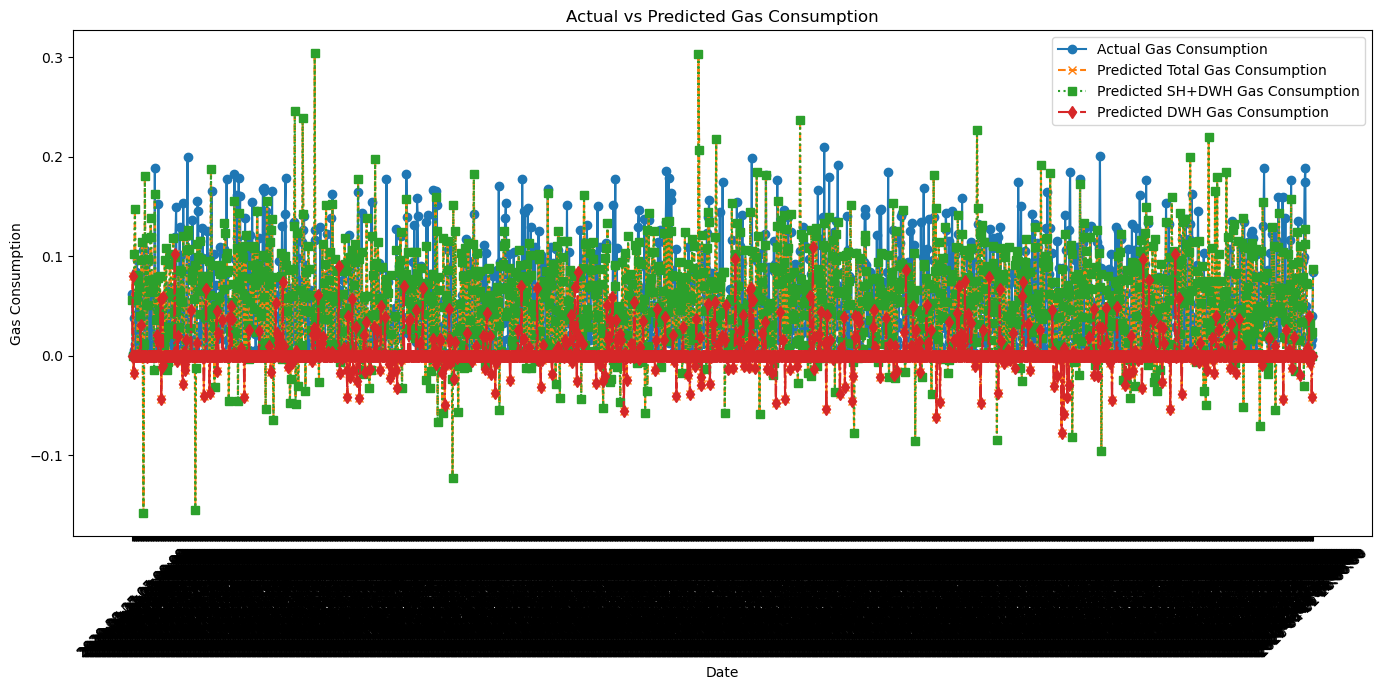

In [229]:
#import matplotlib.dates as mdates

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')



plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [230]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_1 = mean_absolute_error(y_test, predictions)
mse_1 = mean_squared_error(y_test, predictions)
r2_1 = r2_score(y_test, predictions)
mape_1 = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae_1}')
print(f'Mean Squared Error (MSE): {mse_1}')
print(f'R-squared (R²): {r2_1}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_1}%')

Mean Absolute Error (MAE): 0.03895836141980624
Mean Squared Error (MSE): 0.0025346461794020217
R-squared (R²): -0.24864245931831763
Mean Absolute Percentage Error (MAPE): 2.224136456138781%


In [305]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns



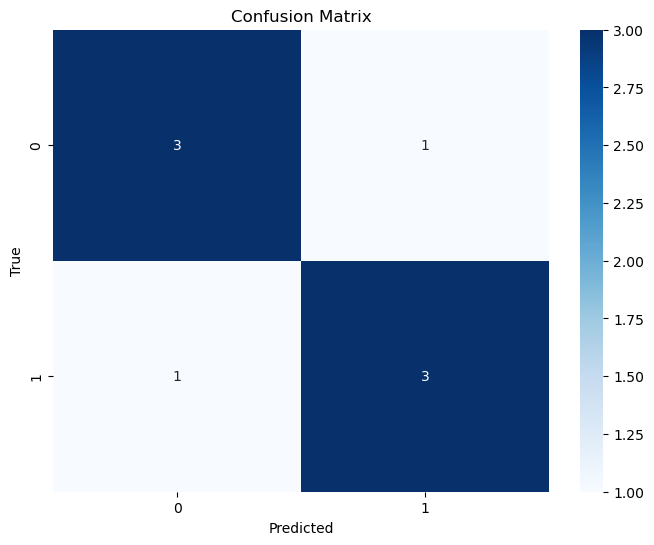

In [314]:
# Convert continuous target and predictions into discrete classes
num_bins = 2
y_test_binned = pd.qcut(y_test, num_bins, labels=False)
predictions_binned = pd.qcut(predictions, num_bins, labels=False)

# Compute confusion matrix
cm = confusion_matrix(y_test_binned, predictions_binned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_bins), yticklabels=range(num_bins))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 4 hourly

In [231]:
daily_stat = pd.read_csv('hourly_4_stat.csv').dropna()


In [232]:
df=daily_stat.dropna()

features = df[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']].dropna()
target = df['Gas_mean'].dropna()

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)


Test R^2 Score: 0.29240159719396486


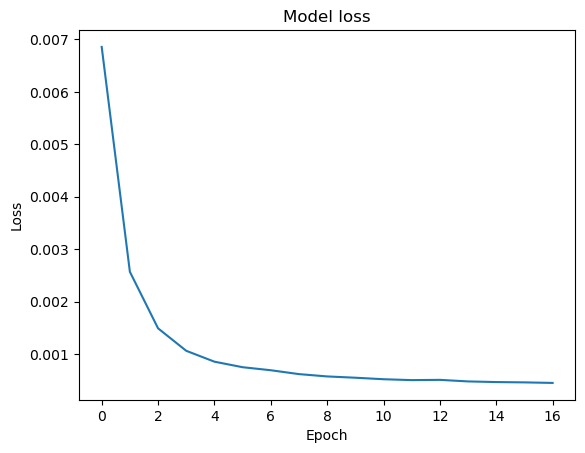

In [233]:


# Build neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32,16), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate model
loss = model.score(X_test, y_test)
print(f'Test R^2 Score: {loss}')

# Plotting training loss values
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [234]:
df.dtypes

date              object
Gas_sum          float64
Gas_max          float64
Gas_min          float64
Gas_mean         float64
ext_temp_max     float64
ext_temp_min     float64
ext_temp_mean    float64
ext_hum_max      float64
ext_hum_min      float64
ext_hum_mean     float64
SH_temp_max      float64
SH_temp_min      float64
SH_temp_mean     float64
SH_hum_max       float64
SH_hum_min       float64
SH_hum_mean      float64
DWH_temp_max     float64
DWH_temp_min     float64
DWH_temp_mean    float64
DWH_hum_max      float64
DWH_hum_min      float64
DWH_hum_mean     float64
dtype: object

In [235]:
# Predict gas consumption on the test set
predictions = model.predict(X_test)

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
# Replace with your actual logic to determine SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
# These are placeholders. Replace with your actual decomposition method if available
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods


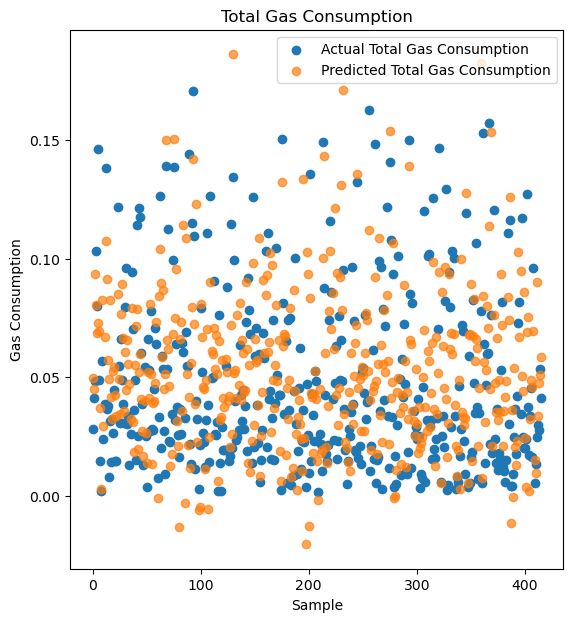

In [236]:

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()


plt.show()

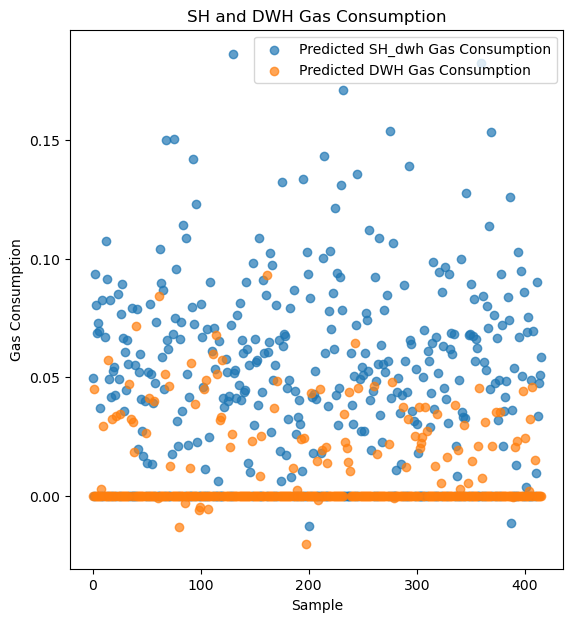

In [237]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH_dwh Gas Consumption', alpha=0.7)
plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
plt.title('SH and DWH Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

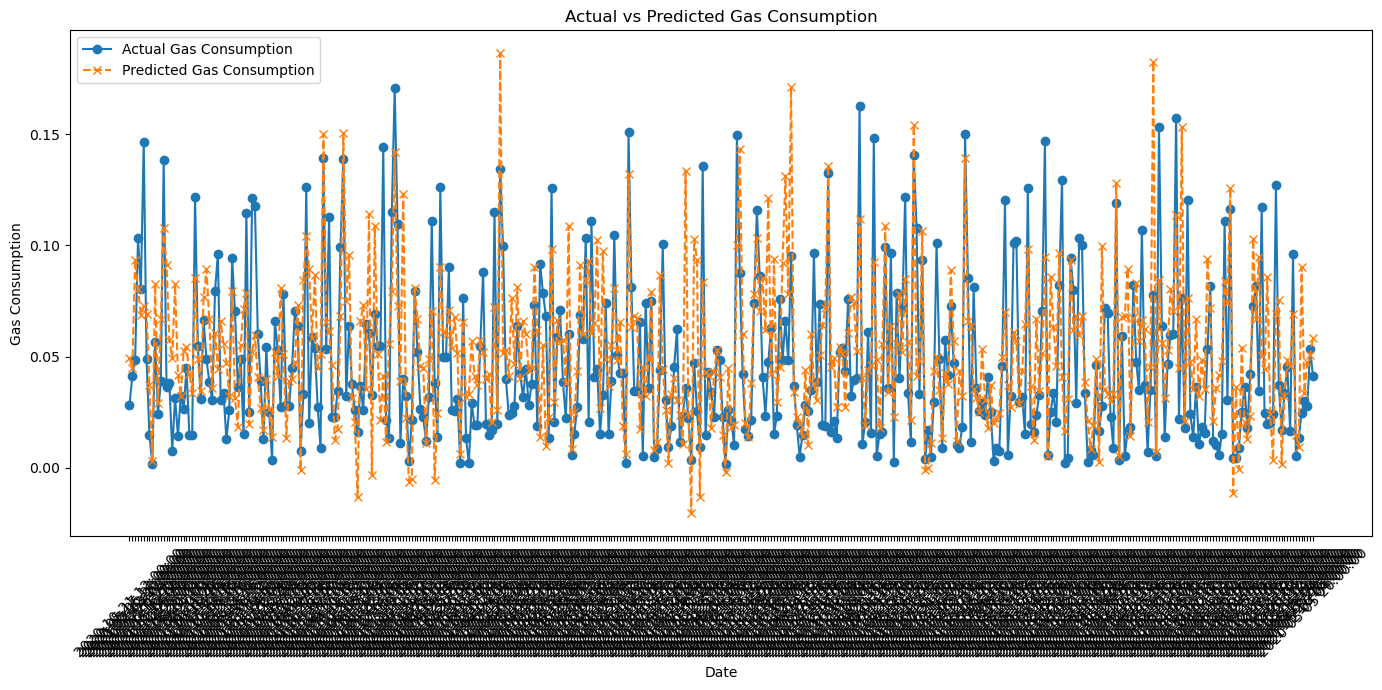

In [238]:
# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

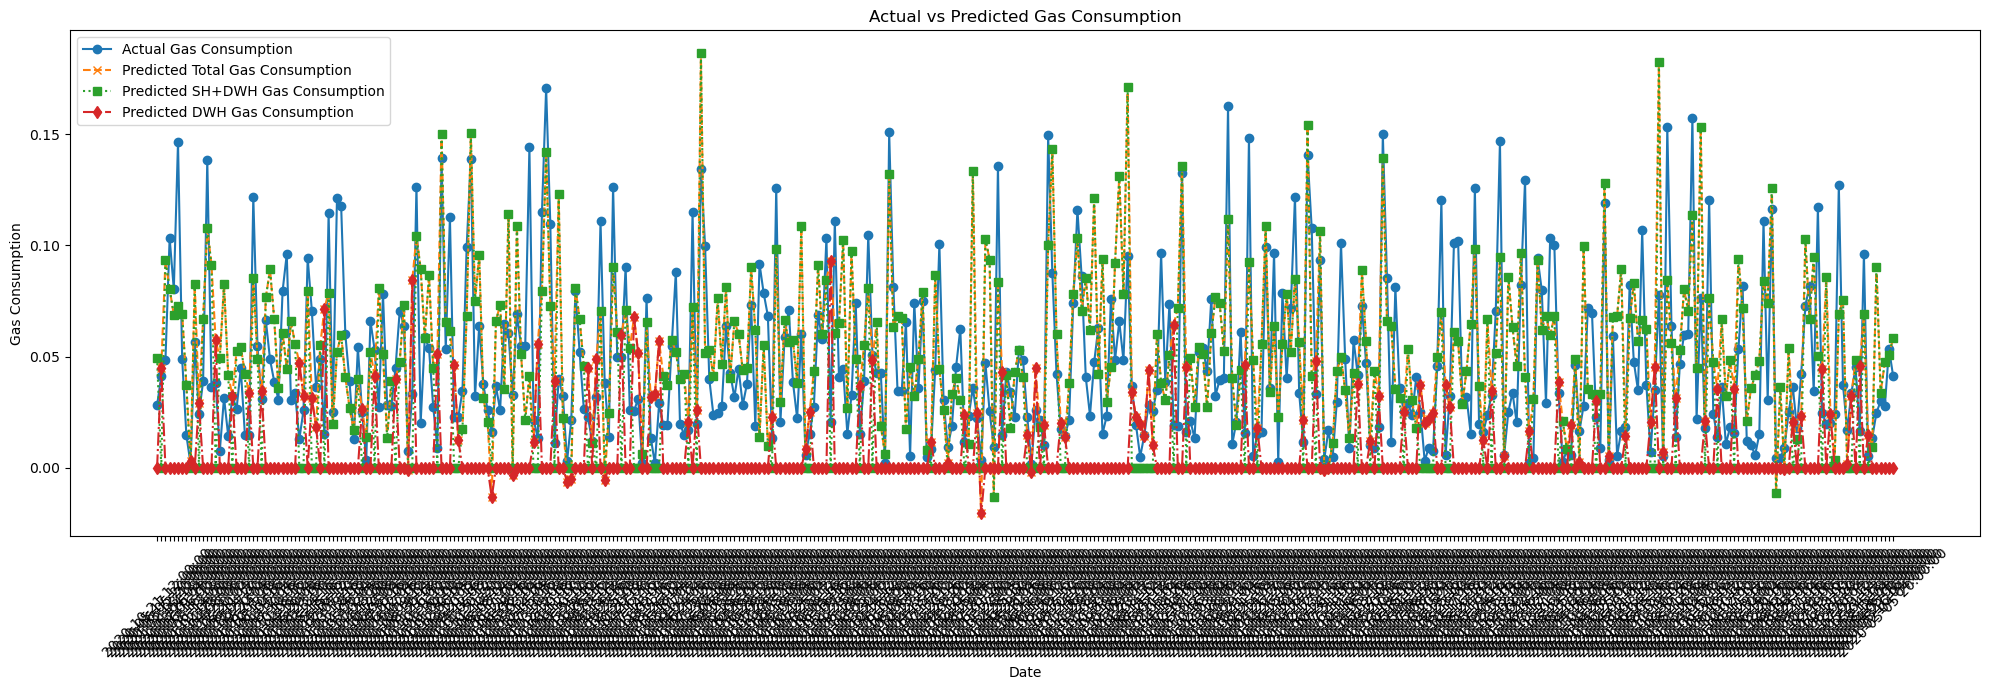

In [239]:
#import matplotlib.dates as mdates

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(20, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')



plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_4 = mean_absolute_error(y_test, predictions)
mse_4 = mean_squared_error(y_test, predictions)
r2_4 = r2_score(y_test, predictions)
mape_4 = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae_4}')
print(f'Mean Squared Error (MSE): {mse_4}')
print(f'R-squared (R²): {r2_4}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_4}%')

Mean Absolute Error (MAE): 0.024856446917380152
Mean Squared Error (MSE): 0.0010166943147456788
R-squared (R²): 0.29240159719396486
Mean Absolute Percentage Error (MAPE): 1.0231578192187811%


# 8 hourly

In [241]:
daily_stat = pd.read_csv('hourly_8_stat.csv').dropna()


In [242]:
df=daily_stat.dropna()

features = df[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']].dropna()
target = df['Gas_mean'].dropna()

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)


Test R^2 Score: 0.3793710572257939


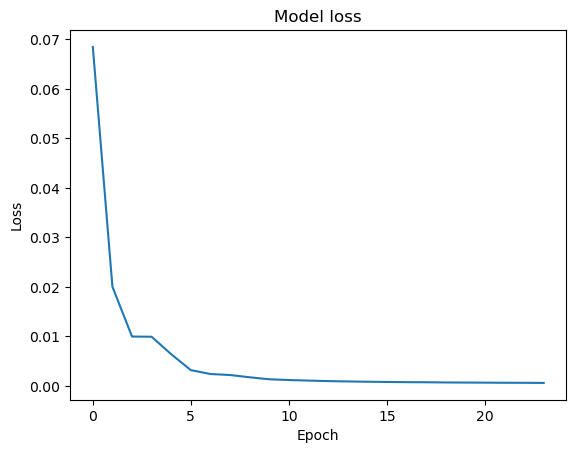

In [243]:


# Build neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate model
loss = model.score(X_test, y_test)
print(f'Test R^2 Score: {loss}')

# Plotting training loss values
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [244]:
df.dtypes

date              object
Gas_sum          float64
Gas_max          float64
Gas_min          float64
Gas_mean         float64
ext_temp_max     float64
ext_temp_min     float64
ext_temp_mean    float64
ext_hum_max      float64
ext_hum_min      float64
ext_hum_mean     float64
SH_temp_max      float64
SH_temp_min      float64
SH_temp_mean     float64
SH_hum_max       float64
SH_hum_min       float64
SH_hum_mean      float64
DWH_temp_max     float64
DWH_temp_min     float64
DWH_temp_mean    float64
DWH_hum_max      float64
DWH_hum_min      float64
DWH_hum_mean     float64
dtype: object

In [245]:
# Predict gas consumption on the test set
predictions = model.predict(X_test)

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
# Replace with your actual logic to determine SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
# These are placeholders. Replace with your actual decomposition method if available
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods


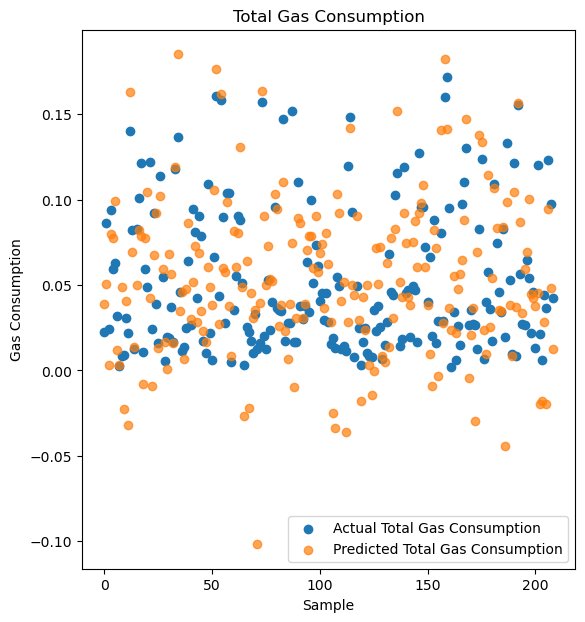

In [246]:

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()


plt.show()

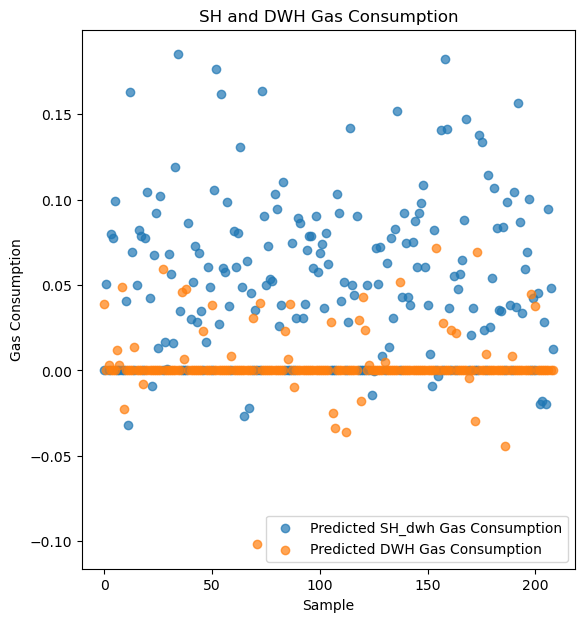

In [247]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH_dwh Gas Consumption', alpha=0.7)
plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
plt.title('SH and DWH Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

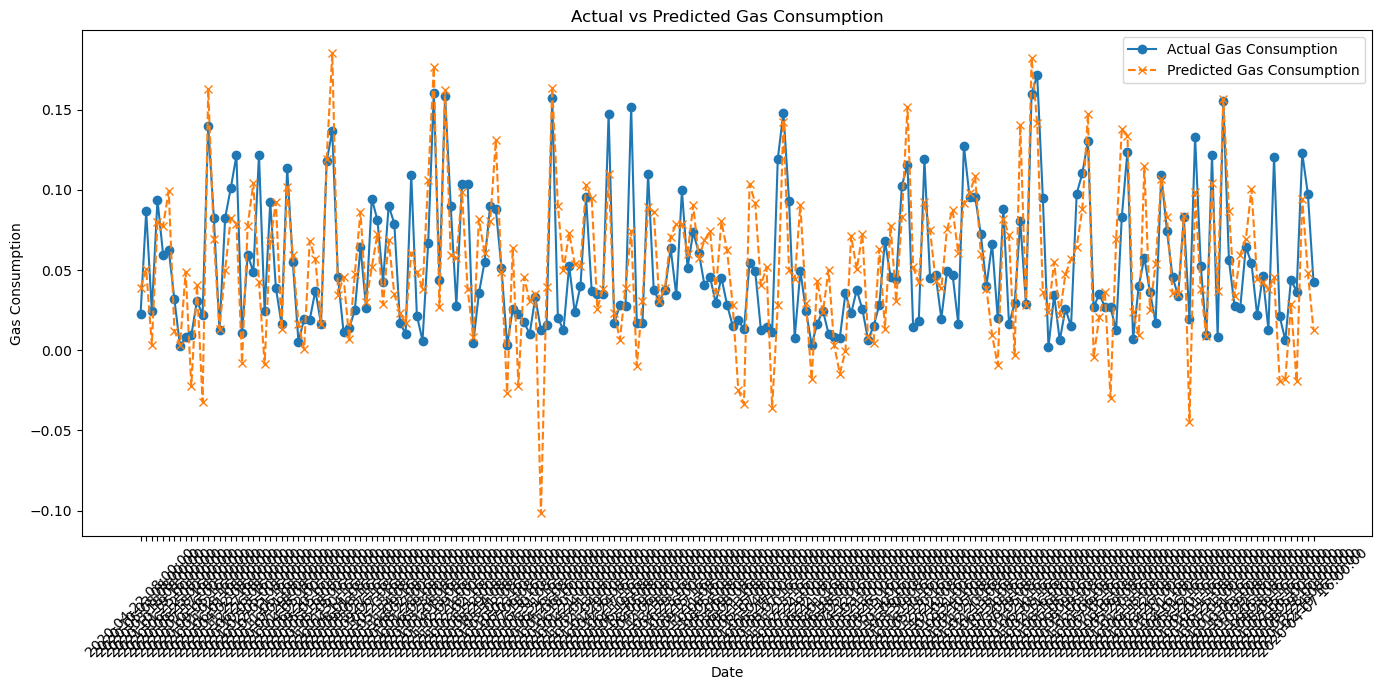

In [248]:
# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

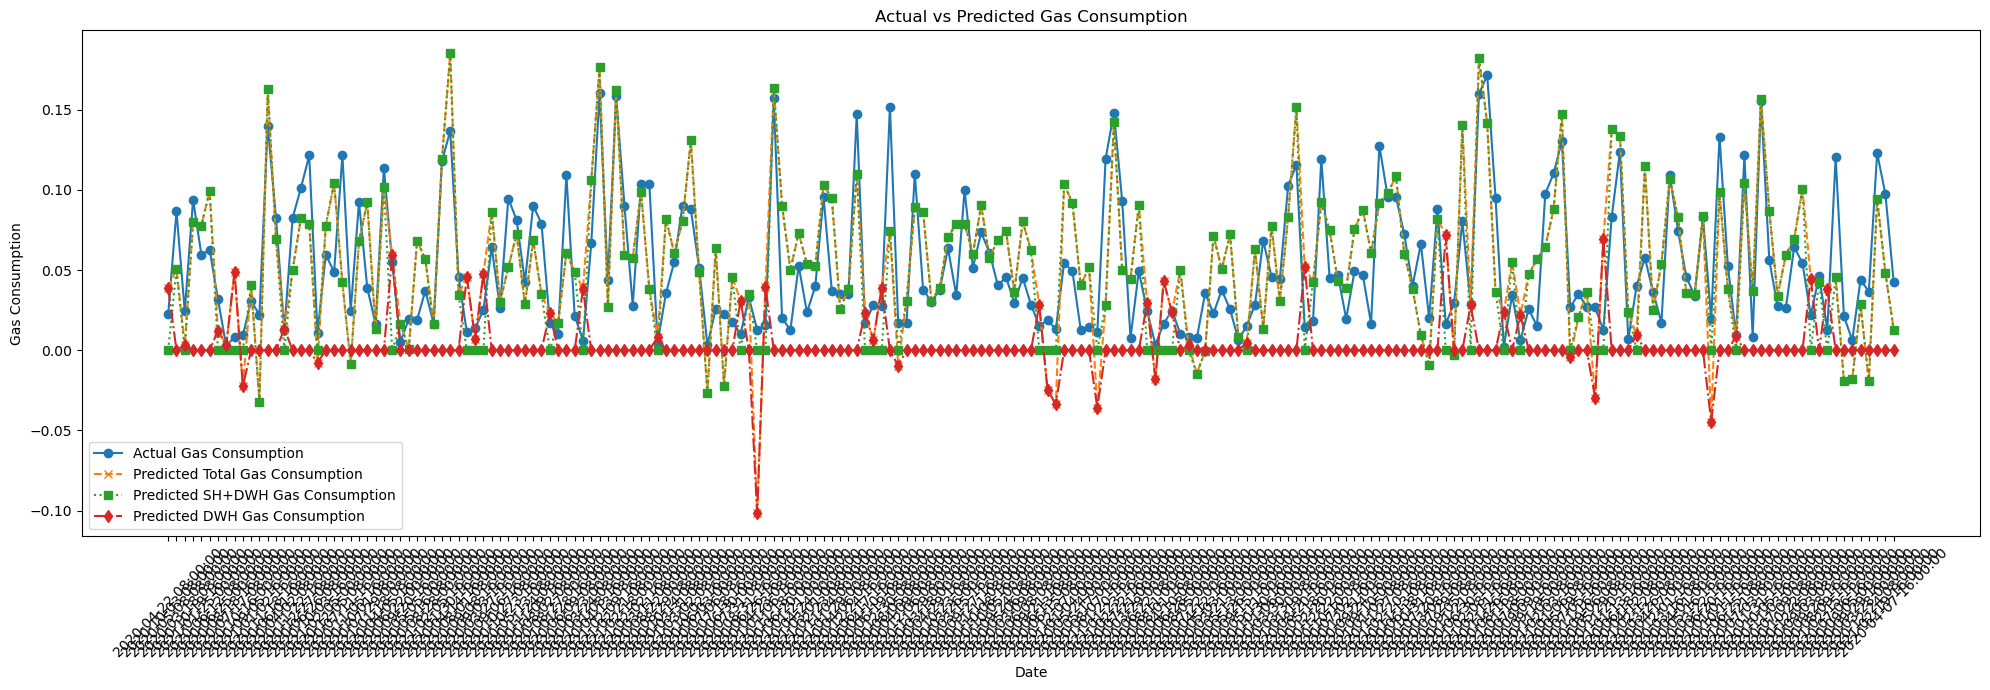

In [249]:
#import matplotlib.dates as mdates

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(20, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')



plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [250]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_8 = mean_absolute_error(y_test, predictions)
mse_8 = mean_squared_error(y_test, predictions)
r2_8 = r2_score(y_test, predictions)
mape_8 = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae_8}')
print(f'Mean Squared Error (MSE): {mse_8}')
print(f'R-squared (R²): {r2_8}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_8}%')

Mean Absolute Error (MAE): 0.0264527088520482
Mean Squared Error (MSE): 0.0010807821943712977
R-squared (R²): 0.3793710572257939
Mean Absolute Percentage Error (MAPE): 1.0858453258908822%


# 12 hourly

In [251]:
daily_stat = pd.read_csv('hourly_12_stat.csv').dropna()


In [252]:
df=daily_stat.dropna()

features = df[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']].dropna()
target = df['Gas_mean'].dropna()

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)


Test R^2 Score: 0.13401080142634192


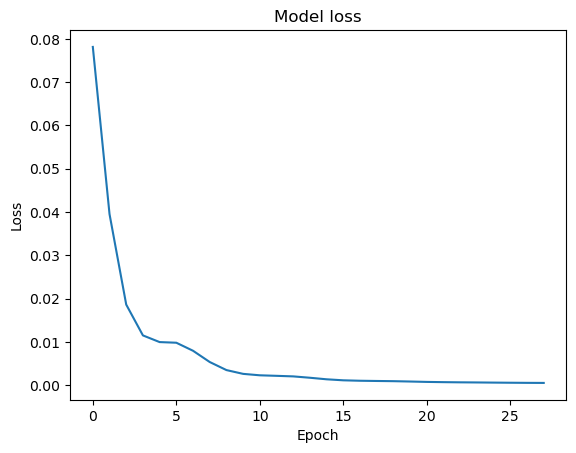

In [253]:


# Build neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate model
loss = model.score(X_test, y_test)
print(f'Test R^2 Score: {loss}')

# Plotting training loss values
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [254]:
df.dtypes

date              object
Gas_sum          float64
Gas_max          float64
Gas_min          float64
Gas_mean         float64
ext_temp_max     float64
ext_temp_min     float64
ext_temp_mean    float64
ext_hum_max      float64
ext_hum_min      float64
ext_hum_mean     float64
SH_temp_max      float64
SH_temp_min      float64
SH_temp_mean     float64
SH_hum_max       float64
SH_hum_min       float64
SH_hum_mean      float64
DWH_temp_max     float64
DWH_temp_min     float64
DWH_temp_mean    float64
DWH_hum_max      float64
DWH_hum_min      float64
DWH_hum_mean     float64
dtype: object

In [255]:
# Predict gas consumption on the test set
predictions = model.predict(X_test)

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
# Replace with your actual logic to determine SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
# These are placeholders. Replace with your actual decomposition method if available
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods


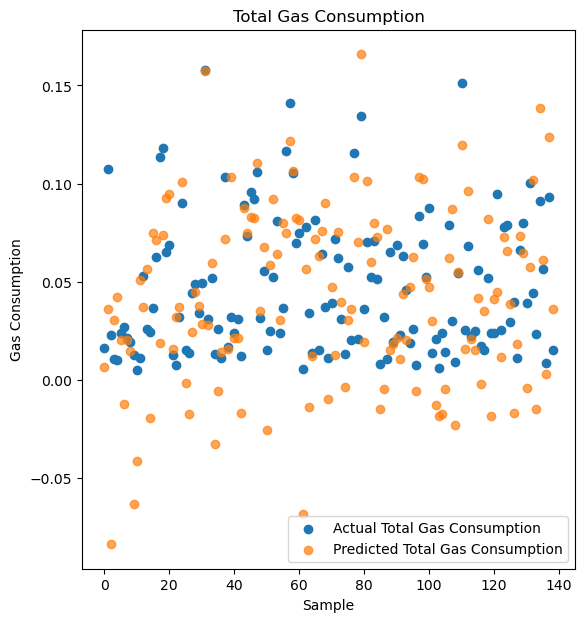

In [256]:

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()


plt.show()

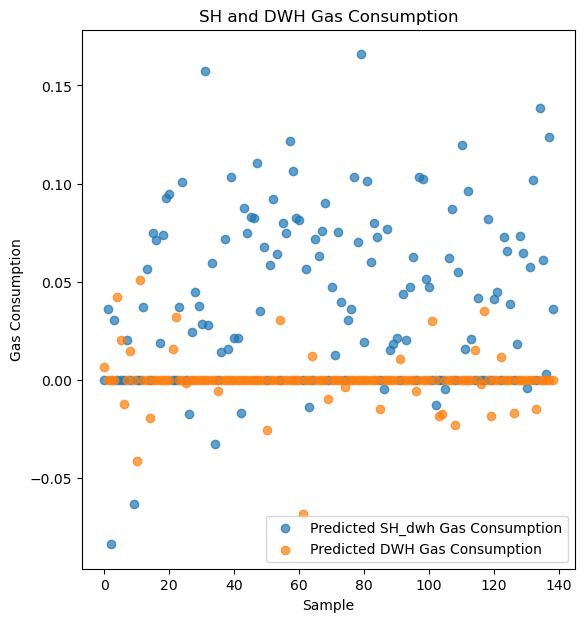

In [257]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH_dwh Gas Consumption', alpha=0.7)
plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
plt.title('SH and DWH Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

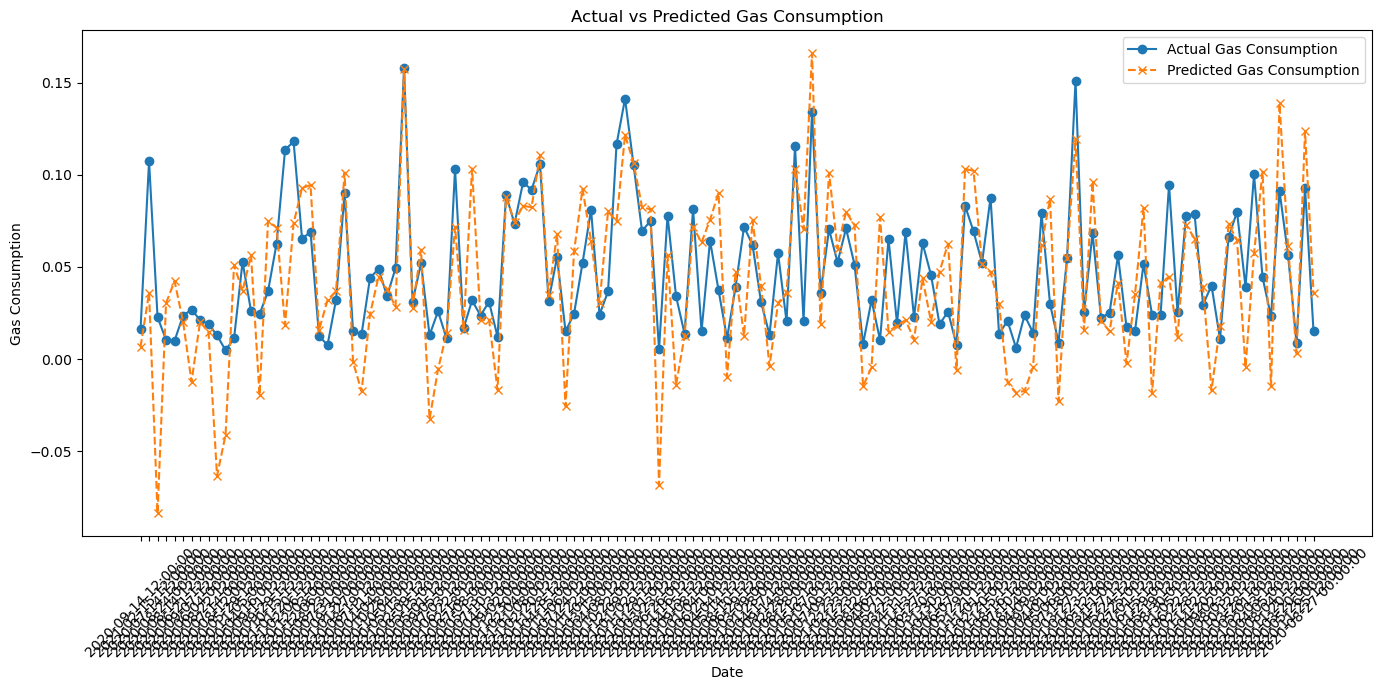

In [258]:
# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

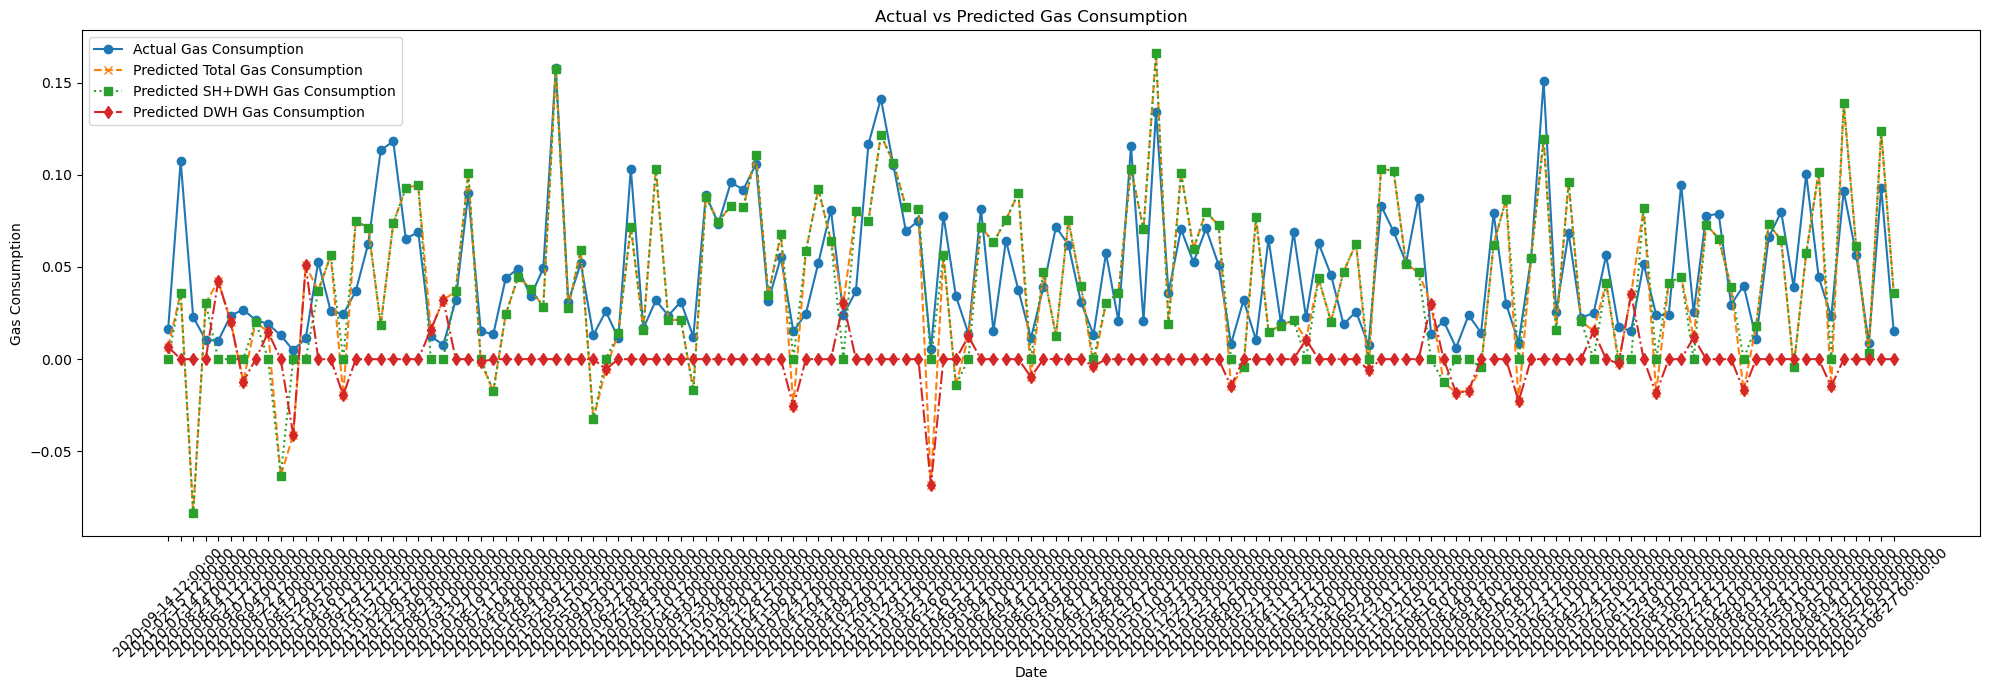

In [259]:
#import matplotlib.dates as mdates

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(20, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')



plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_12 = mean_absolute_error(y_test, predictions)
mse_12 = mean_squared_error(y_test, predictions)
r2_12 = r2_score(y_test, predictions)
mape_12 = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae_12}')
print(f'Mean Squared Error (MSE): {mse_12}')
print(f'R-squared (R²): {r2_12}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_12}%')

Mean Absolute Error (MAE): 0.024937816050661032
Mean Squared Error (MSE): 0.001035026658872064
R-squared (R²): 0.13401080142634192
Mean Absolute Percentage Error (MAPE): 1.0687150886672758%


# daily

In [261]:
daily_stat = pd.read_csv('daily_stat.csv').dropna()


In [262]:
df=daily_stat.dropna()

features = df[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']].dropna()
target = df['Gas_mean'].dropna()

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)


Test R^2 Score: -0.1749959205278735


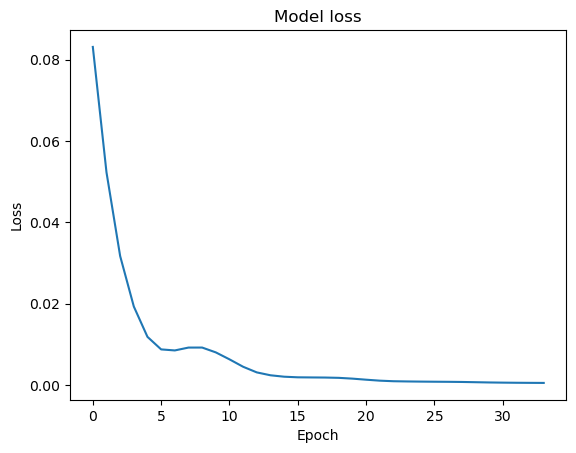

In [263]:


# Build neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate model
loss = model.score(X_test, y_test)
print(f'Test R^2 Score: {loss}')

# Plotting training loss values
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [264]:
df.dtypes

date              object
Gas_sum          float64
Gas_max          float64
Gas_min          float64
Gas_mean         float64
ext_temp_max     float64
ext_temp_min     float64
ext_temp_mean    float64
ext_hum_max      float64
ext_hum_min      float64
ext_hum_mean     float64
SH_temp_max      float64
SH_temp_min      float64
SH_temp_mean     float64
SH_hum_max       float64
SH_hum_min       float64
SH_hum_mean      float64
DWH_temp_max     float64
DWH_temp_min     float64
DWH_temp_mean    float64
DWH_hum_max      float64
DWH_hum_min      float64
DWH_hum_mean     float64
dtype: object

In [265]:
# Predict gas consumption on the test set
predictions = model.predict(X_test)

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
# Replace with your actual logic to determine SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
# These are placeholders. Replace with your actual decomposition method if available
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods


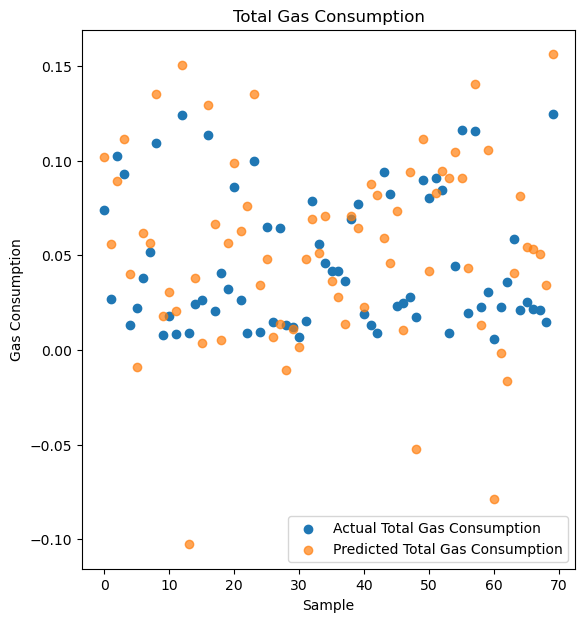

In [266]:

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()


plt.show()

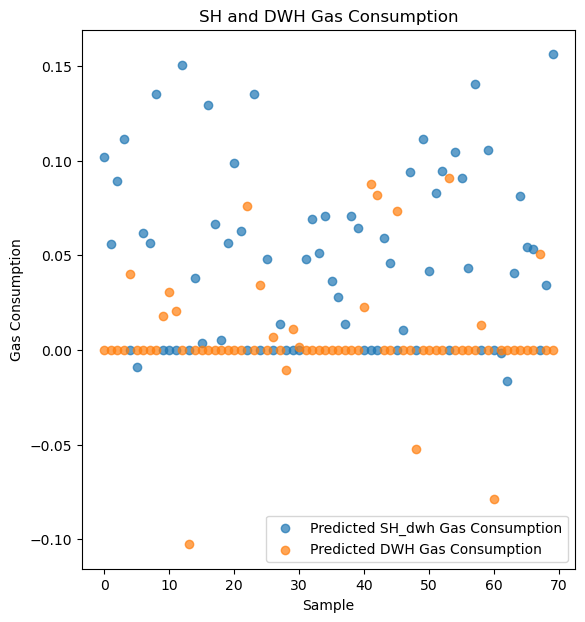

In [267]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH_dwh Gas Consumption', alpha=0.7)
plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
plt.title('SH and DWH Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

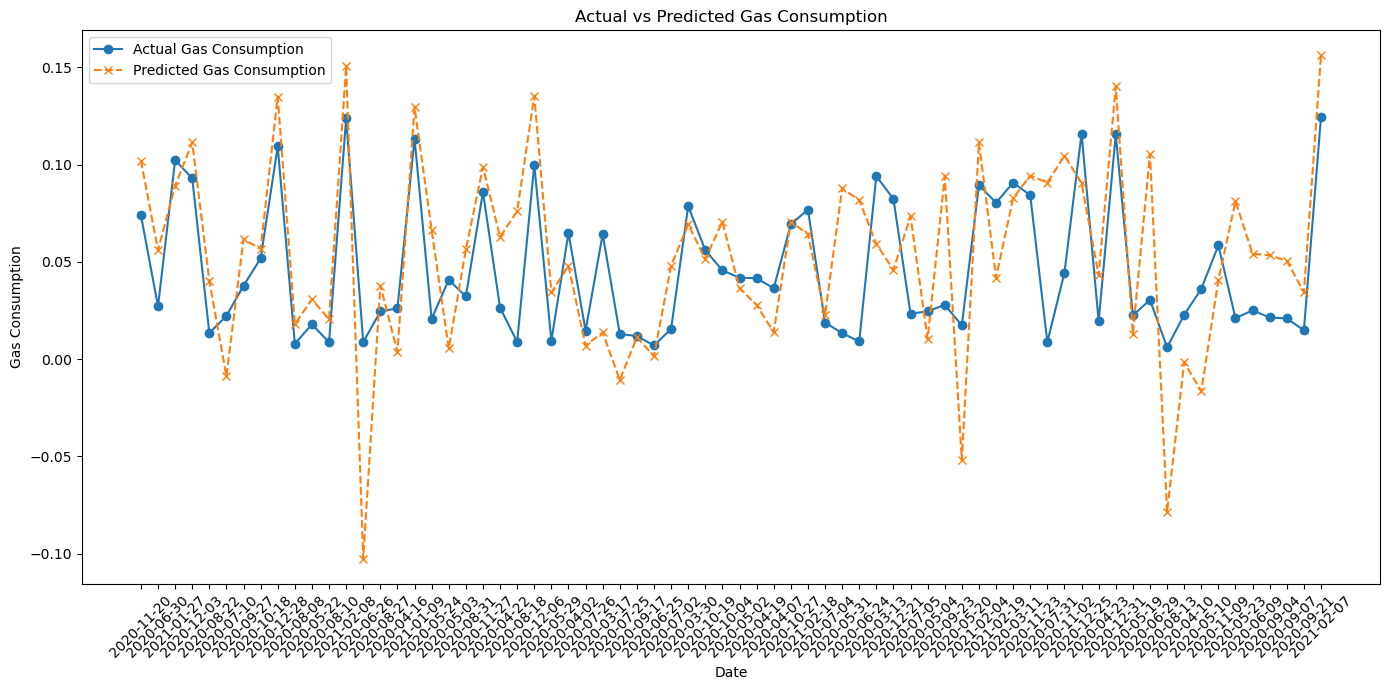

In [268]:
# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

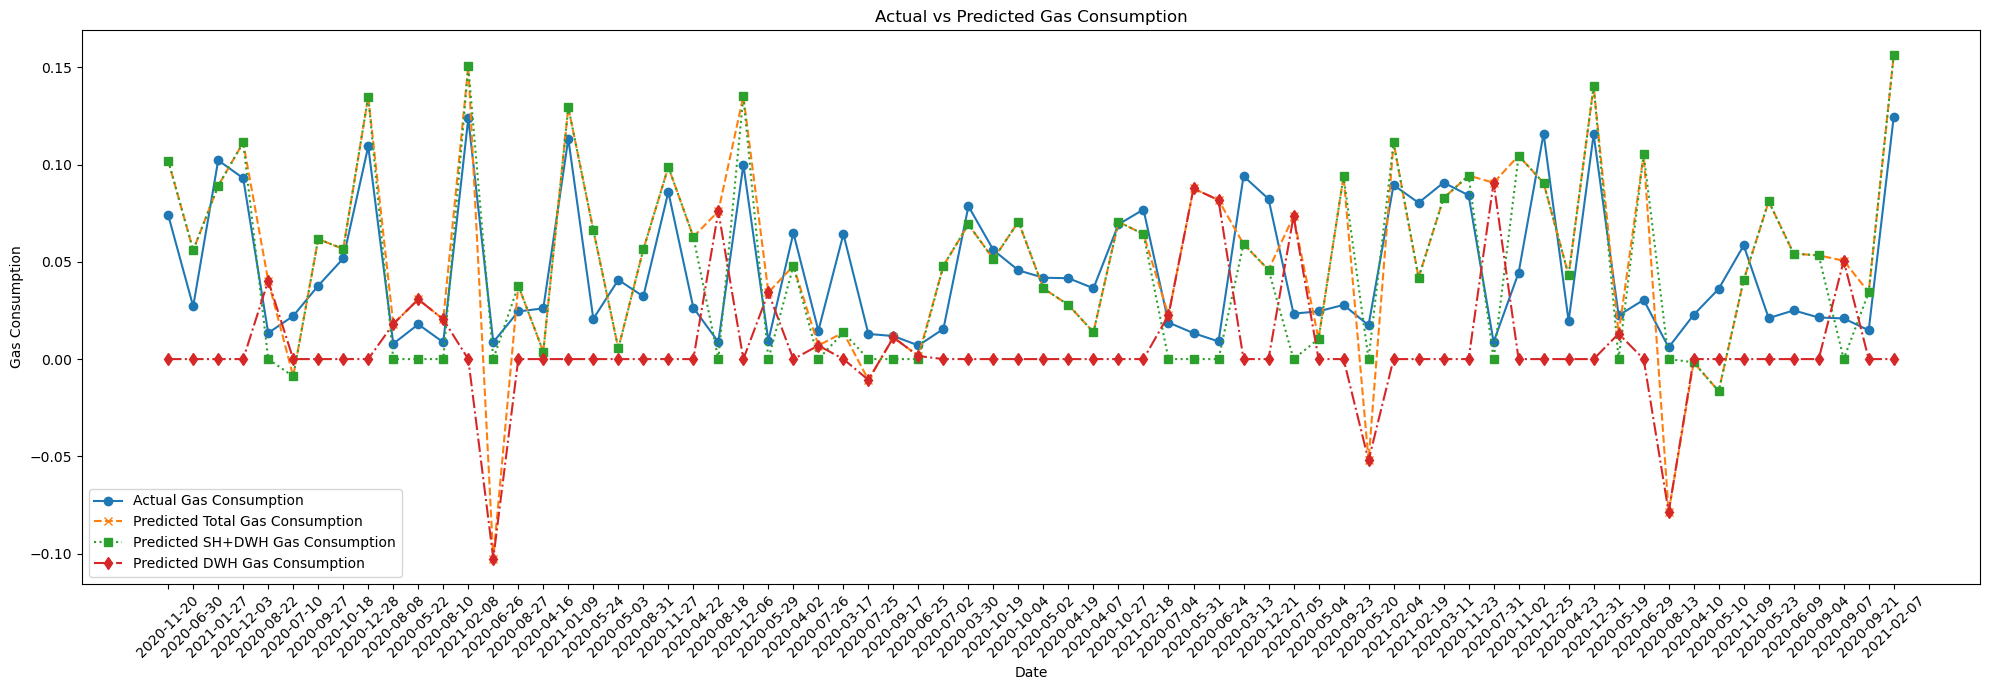

In [269]:
#import matplotlib.dates as mdates

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(20, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')



plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [270]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_1d = mean_absolute_error(y_test, predictions)
mse_1d = mean_squared_error(y_test, predictions)
r2_1d = r2_score(y_test, predictions)
mape_1d = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae_1d}')
print(f'Mean Squared Error (MSE): {mse_1d}')
print(f'R-squared (R²): {r2_1d}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_1d}%')

Mean Absolute Error (MAE): 0.03031761485767948
Mean Squared Error (MSE): 0.0014482767007900253
R-squared (R²): -0.1749959205278735
Mean Absolute Percentage Error (MAPE): 1.6231960666764516%


# 3 daily

In [271]:
daily_stat = pd.read_csv('3_daily_stat.csv').dropna()


In [272]:
df=daily_stat.dropna()

features = df[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']].dropna()
target = df['Gas_mean'].dropna()

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)


Test R^2 Score: -0.5271640097229187


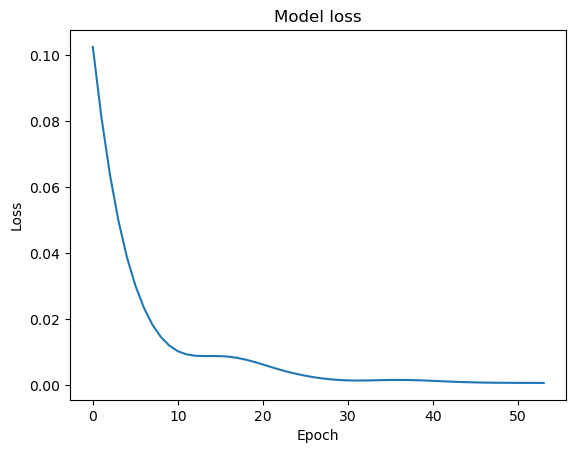

In [273]:


# Build neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate model
loss = model.score(X_test, y_test)
print(f'Test R^2 Score: {loss}')

# Plotting training loss values
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [274]:
df.dtypes

date              object
Gas_sum          float64
Gas_max          float64
Gas_min          float64
Gas_mean         float64
ext_temp_max     float64
ext_temp_min     float64
ext_temp_mean    float64
ext_hum_max      float64
ext_hum_min      float64
ext_hum_mean     float64
SH_temp_max      float64
SH_temp_min      float64
SH_temp_mean     float64
SH_hum_max       float64
SH_hum_min       float64
SH_hum_mean      float64
DWH_temp_max     float64
DWH_temp_min     float64
DWH_temp_mean    float64
DWH_hum_max      float64
DWH_hum_min      float64
DWH_hum_mean     float64
dtype: object

In [275]:
# Predict gas consumption on the test set
predictions = model.predict(X_test)

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
# Replace with your actual logic to determine SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
# These are placeholders. Replace with your actual decomposition method if available
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods


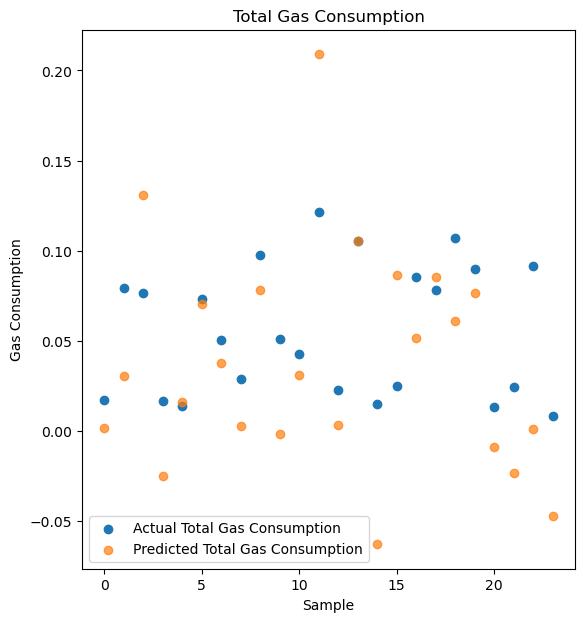

In [276]:

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()


plt.show()

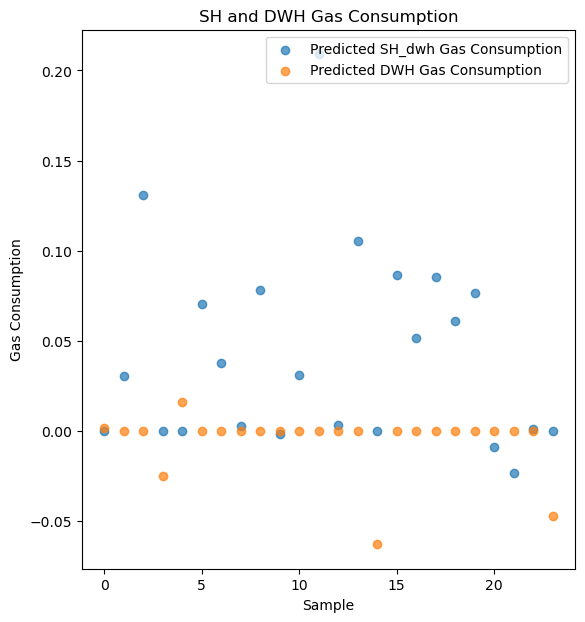

In [277]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH_dwh Gas Consumption', alpha=0.7)
plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
plt.title('SH and DWH Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

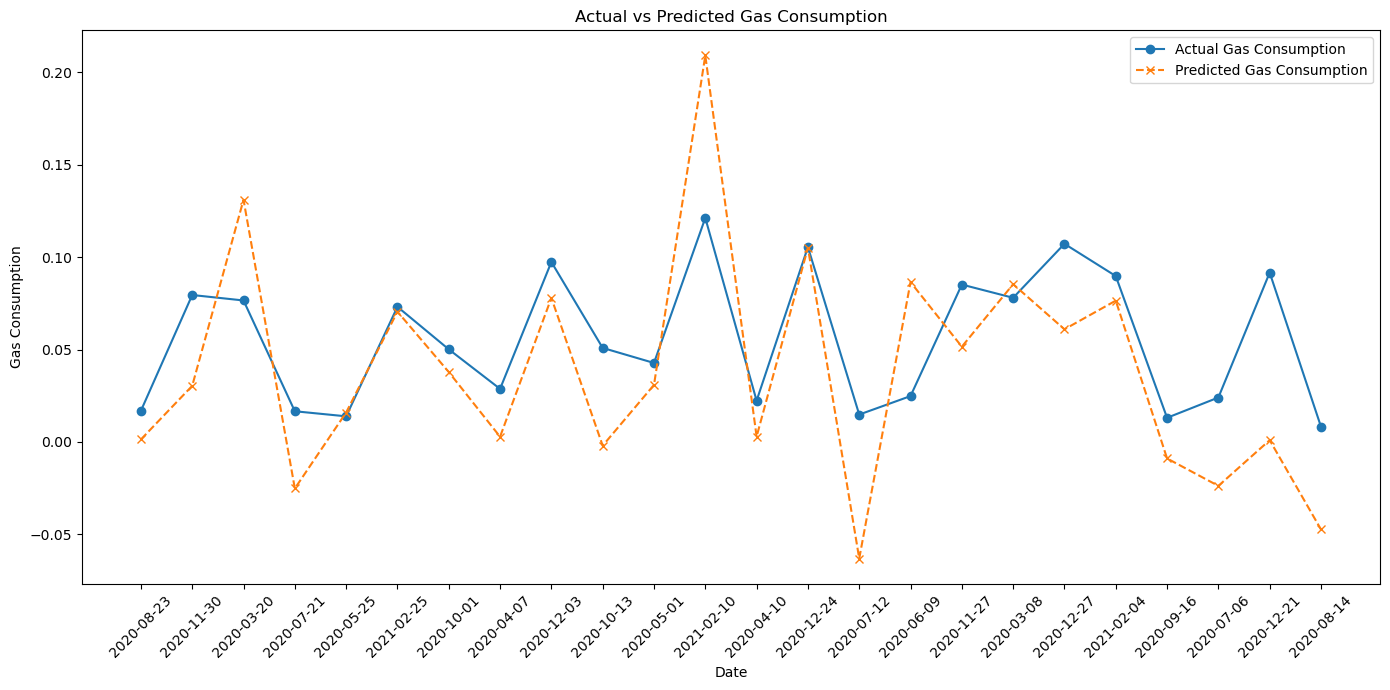

In [278]:
# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

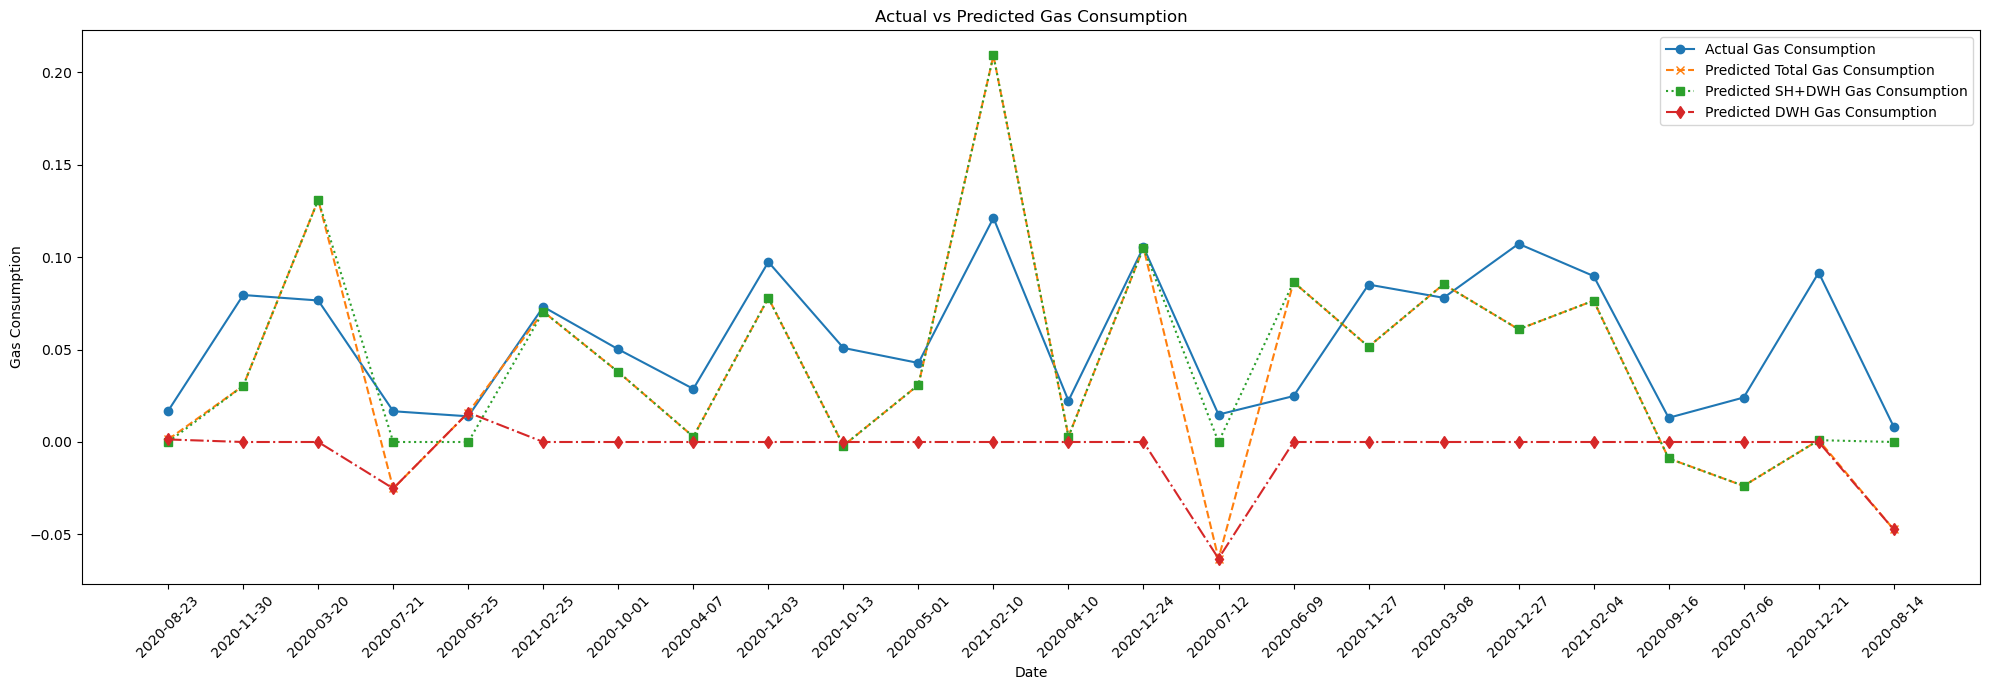

In [279]:
#import matplotlib.dates as mdates

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(20, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')



plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [280]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae_3d = mean_absolute_error(y_test, predictions)
mse_3d = mean_squared_error(y_test, predictions)
r2_3d = r2_score(y_test, predictions)
mape_3d = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae_3d}')
print(f'Mean Squared Error (MSE): {mse_3d}')
print(f'R-squared (R²): {r2_3d}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_3d}%')

Mean Absolute Error (MAE): 0.03547229646154147
Mean Squared Error (MSE): 0.0019593517126703813
R-squared (R²): -0.5271640097229187
Mean Absolute Percentage Error (MAPE): 1.2245024258769037%


# 10 daily

In [281]:
daily_stat = pd.read_csv('10_daily_stat.csv').dropna()


In [282]:
df=daily_stat.dropna()

features = df[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean','ext_hum_mean']].dropna()
target = df['Gas_mean'].dropna()

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)


Test R^2 Score: -0.5025223167190755


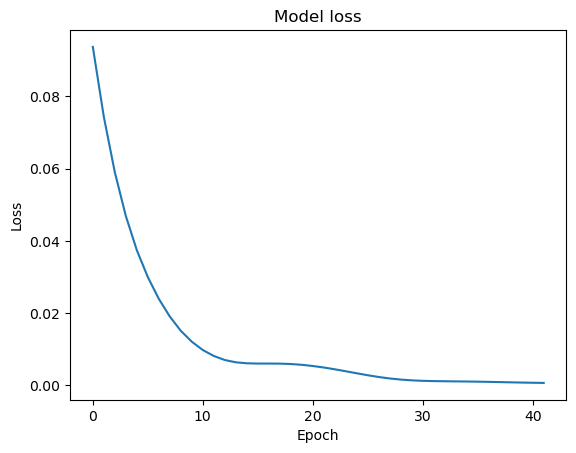

In [283]:


# Build neural network model
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate model
loss = model.score(X_test, y_test)
print(f'Test R^2 Score: {loss}')

# Plotting training loss values
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [284]:
df.dtypes

date              object
Gas_sum          float64
Gas_max          float64
Gas_min          float64
Gas_mean         float64
ext_temp_max     float64
ext_temp_min     float64
ext_temp_mean    float64
ext_hum_max      float64
ext_hum_min      float64
ext_hum_mean     float64
SH_temp_max      float64
SH_temp_min      float64
SH_temp_mean     float64
SH_hum_max       float64
SH_hum_min       float64
SH_hum_mean      float64
DWH_temp_max     float64
DWH_temp_min     float64
DWH_temp_mean    float64
DWH_hum_max      float64
DWH_hum_min      float64
DWH_hum_mean     float64
dtype: object

In [285]:
# Predict gas consumption on the test set
predictions = model.predict(X_test)

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
# Replace with your actual logic to determine SH and DWH periods
external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
sh_dwh_periods = external_temp_test < 15
dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
# These are placeholders. Replace with your actual decomposition method if available
sh_dwh_contributions = predictions * sh_dwh_periods
dwh_contributions = predictions * dwh_periods


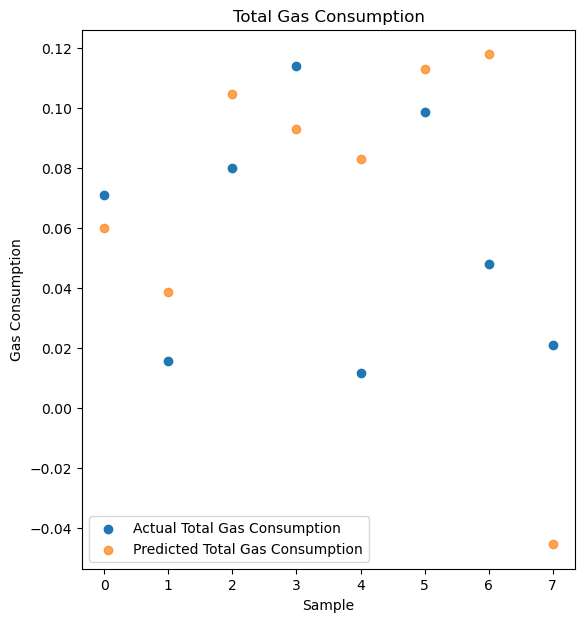

In [286]:

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()


plt.show()

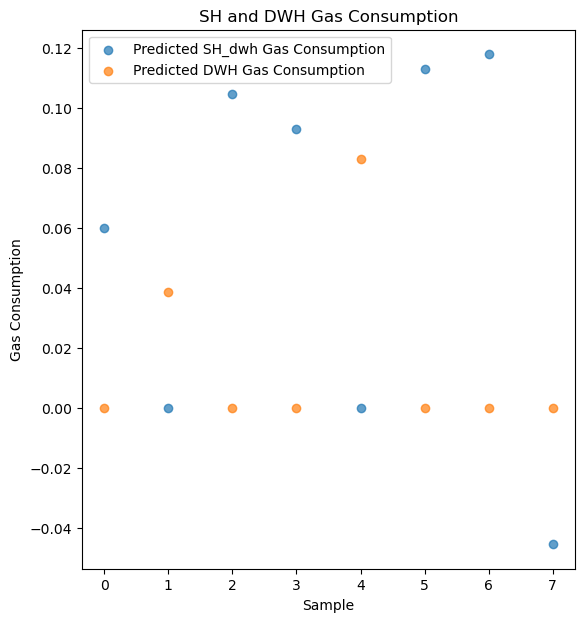

In [287]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH_dwh Gas Consumption', alpha=0.7)
plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
plt.title('SH and DWH Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

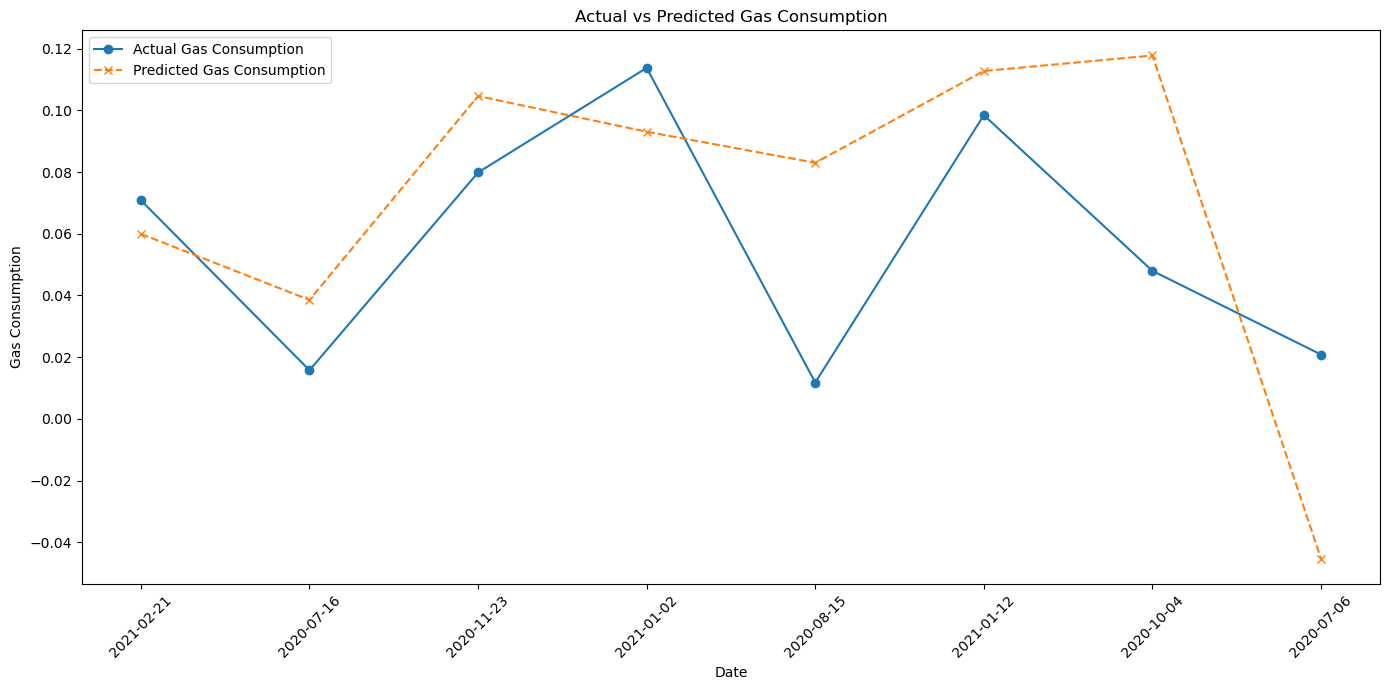

In [288]:
# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

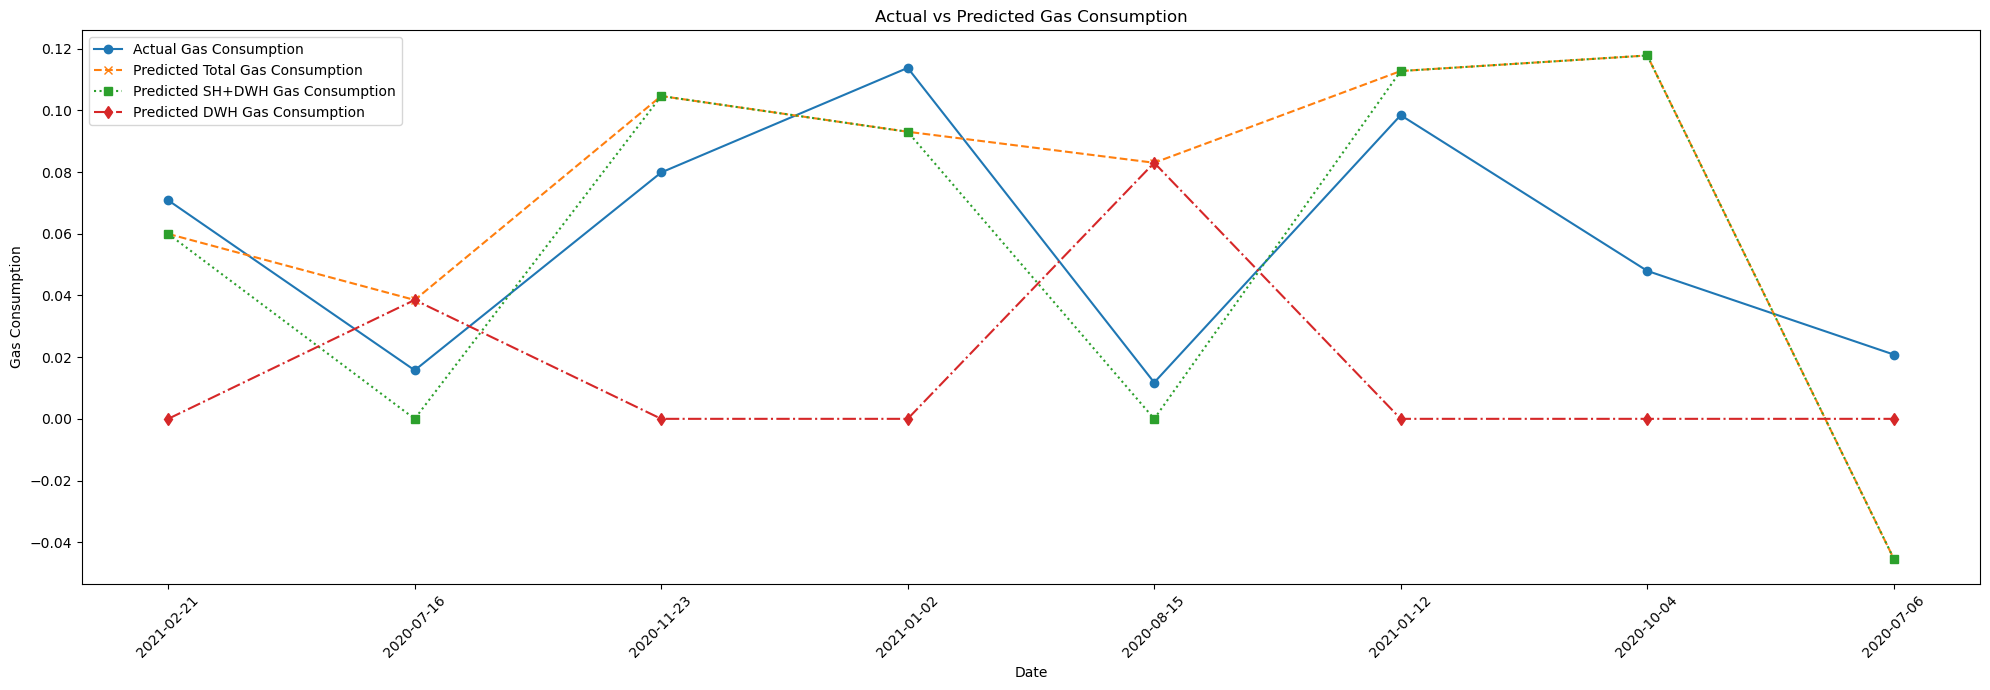

In [289]:
#import matplotlib.dates as mdates

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(20, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')



plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs Predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [290]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 0.03758653382890635
Mean Squared Error (MSE): 0.002026348098056545
R-squared (R²): -0.5025223167190755
Mean Absolute Percentage Error (MAPE): 1.6143649198390642%


# combined 

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    
    return mae, mse, r2, mape

# Load and prepare data for different time periods (replace these with your actual datasets)
datasets = {
    "hourly": pd.read_csv('hourly_stat.csv').dropna(),
    "4 hourly": pd.read_csv('hourly_4_stat.csv').dropna(),
    "8 hourly": pd.read_csv('hourly_8_stat.csv').dropna(),
    "12 hourly": pd.read_csv('hourly_12_stat.csv').dropna(),
    "daily": pd.read_csv('daily_stat.csv').dropna(),
    "3 daily": pd.read_csv('3_daily_stat.csv').dropna()
}

metrics = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MAPE": []
}


In [322]:

# Train and evaluate models for each dataset
for period, data in datasets.items():
    features = data[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean', 'ext_hum_mean']].dropna()
    target = data['Gas_mean'].dropna()

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
    
    mae, mse, r2, mape = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    
    metrics["Model"].append(period)
    metrics["MAE"].append(mae)
    metrics["MSE"].append(mse)
    metrics["R²"].append(r2)
    metrics["MAPE"].append(mape)

metrics_df = pd.DataFrame(metrics)


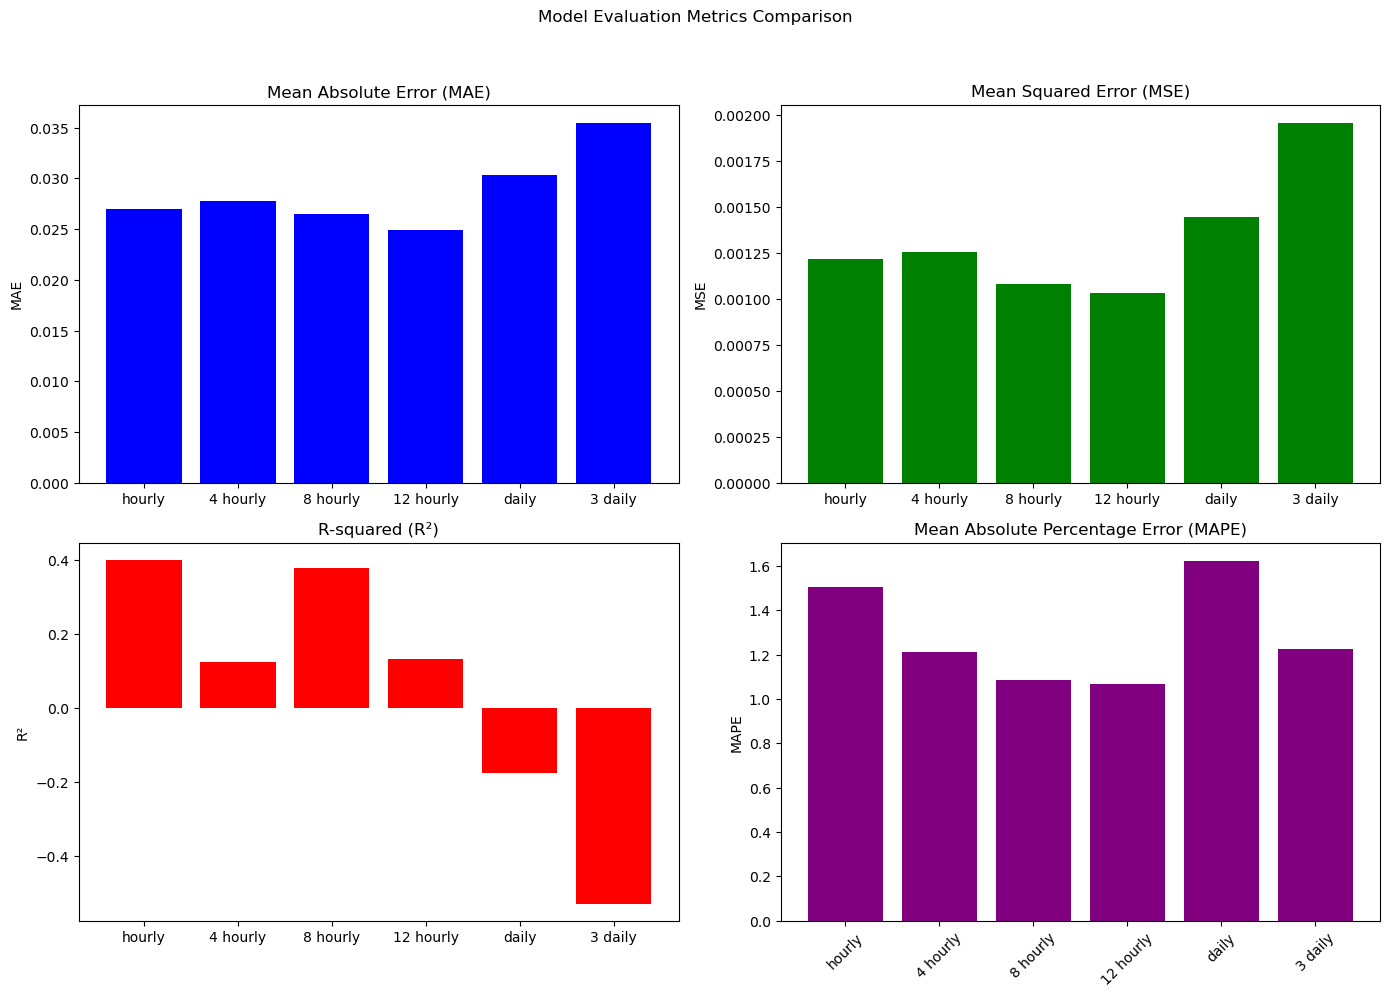

In [323]:

# Plotting the evaluation metrics for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Evaluation Metrics Comparison')

# Plot MAE
axes[0, 0].bar(metrics_df['Model'], metrics_df['MAE'], color='blue')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# Plot MSE
axes[0, 1].bar(metrics_df['Model'], metrics_df['MSE'], color='green')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# Plot R²
axes[1, 0].bar(metrics_df['Model'], metrics_df['R²'], color='red')
axes[1, 0].set_title('R-squared (R²)')
axes[1, 0].set_ylabel('R²')

# Plot MAPE
axes[1, 1].bar(metrics_df['Model'], metrics_df['MAPE'], color='purple')
axes[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axes[1, 1].set_ylabel('MAPE')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xticks(rotation=45)
plt.show()


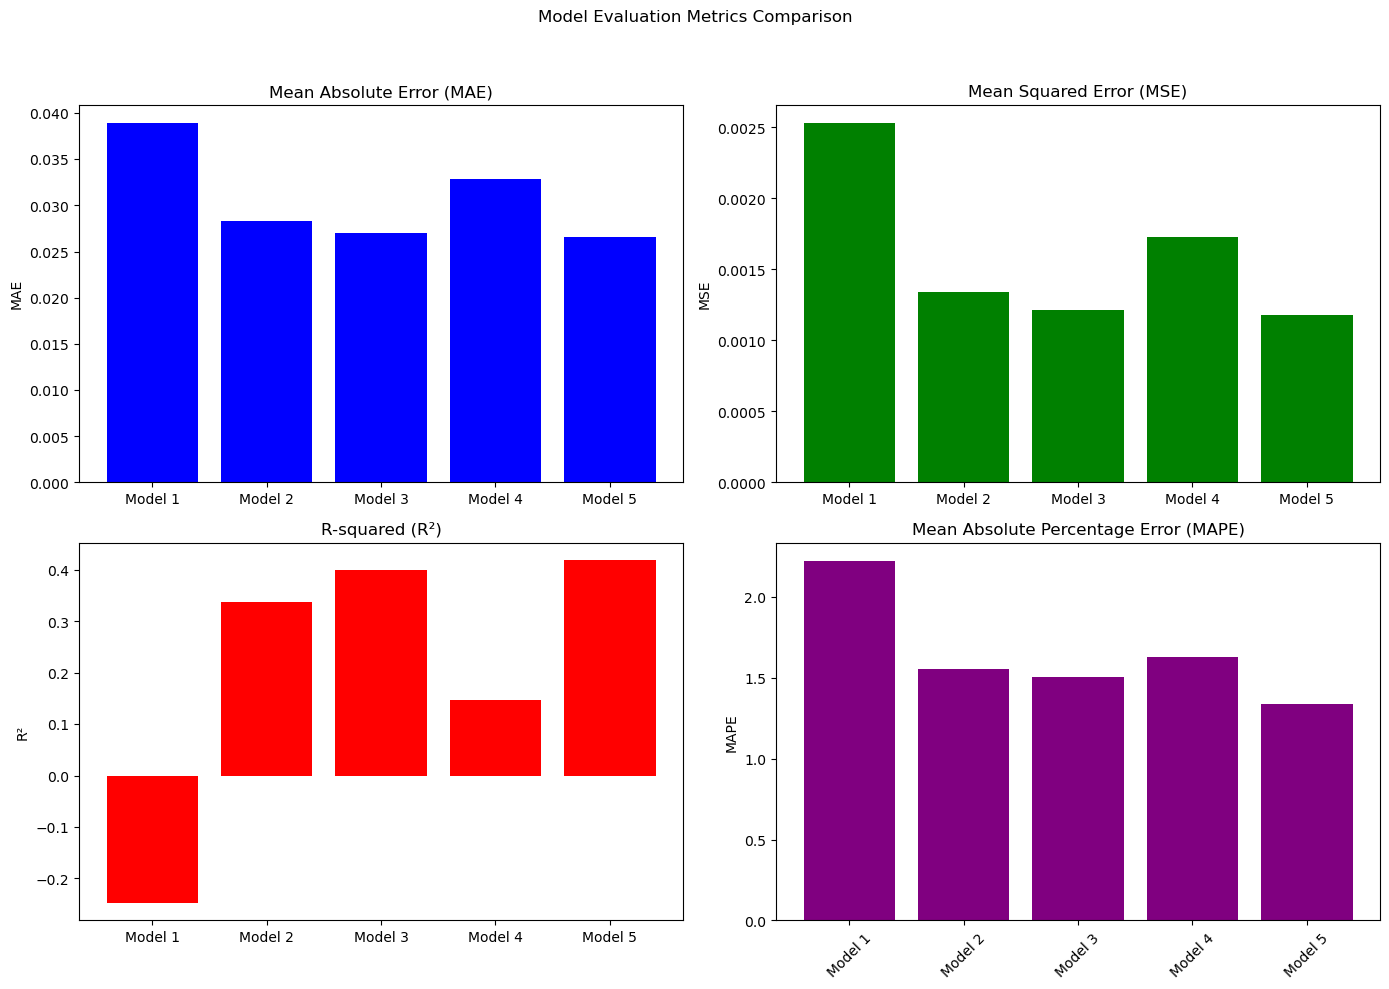

In [324]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Dummy data preparation (Replace with actual data loading and preparation)
daily_stat = pd.read_csv('hourly_stat.csv').dropna()
df = daily_stat.dropna()

features = df[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean', 'ext_temp_mean', 'ext_hum_mean']].dropna()
target = df['Gas_mean'].dropna()

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Define models (Replace with your actual models)
models = {
    "Model 1": MLPRegressor(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=500, random_state=42),
    "Model 2": MLPRegressor(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', max_iter=500, random_state=42),
    "Model 3": MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42),
    "Model 4": MLPRegressor(hidden_layer_sizes=(16, 16, 8), activation='relu', solver='adam', max_iter=500, random_state=42),
    "Model 5": MLPRegressor(hidden_layer_sizes=(32, 16, 8), activation='relu', solver='adam', max_iter=500, random_state=42)
}

# Train models and collect evaluation metrics
metrics = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R²": [],
    "MAPE": []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    metrics["Model"].append(name)
    metrics["MAE"].append(mean_absolute_error(y_test, predictions))
    metrics["MSE"].append(mean_squared_error(y_test, predictions))
    metrics["R²"].append(r2_score(y_test, predictions))
    metrics["MAPE"].append(mean_absolute_percentage_error(y_test, predictions))

metrics_df = pd.DataFrame(metrics)

# Plotting the evaluation metrics for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Evaluation Metrics Comparison')

# Plot MAE
axes[0, 0].bar(metrics_df['Model'], metrics_df['MAE'], color='blue')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# Plot MSE
axes[0, 1].bar(metrics_df['Model'], metrics_df['MSE'], color='green')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# Plot R²
axes[1, 0].bar(metrics_df['Model'], metrics_df['R²'], color='red')
axes[1, 0].set_title('R-squared (R²)')
axes[1, 0].set_ylabel('R²')

# Plot MAPE
axes[1, 1].bar(metrics_df['Model'], metrics_df['MAPE'], color='purple')
axes[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axes[1, 1].set_ylabel('MAPE')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xticks(rotation=45)
plt.show()
